# Análisis Morfológico de Corpus de Canciones con Spycy
Este notebook realiza un análisis morfológico completo de un corpus de letras de canciones con etiquetado POS.

## 1. Importar librerías y cargar datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter, defaultdict
import re
from src.utils import path
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
#plt.style.use('seaborn-v0_8-darkgrid')
#sns.set_palette("husl")
#plt.rcParams['figure.figsize'] = (12, 6)
#plt.rcParams['font.size'] = 10

print("✓ Librerías importadas correctamente")

✓ Librerías importadas correctamente


In [3]:
directorio_proyecto = path.obtener_ruta_local()
df = pd.read_csv(directorio_proyecto+'\\data\\results\\corpus_canciones_spacy.csv',delimiter = ',',decimal = ".", encoding='utf-8')
df.head()

,Artist,nombre_cancion,letra_cancion,Periodo,Genero,tokens,Etiquetado_POS,StopWords,Minusculas,Lematizado
0,Ariana Grande,"​thank u, next",thought i'd end up with sean but he wasn't a m...,2018.0,pop,"['thought', 'i', ""'d"", 'end', 'up', 'with', 's...","[('thought', 'VERB'), ('i', 'PRON'), (""'d"", 'A...","[('thought', 'VERB'), ('end', 'VERB'), ('sean'...","[('thought', 'VERB'), ('end', 'VERB'), ('sean'...","[('thought', 'NOUN'), ('end', 'PROPN'), ('sean..."
1,Ariana Grande,7 rings,yeah breakfast at tiffany's and bottles of bub...,2019.0,pop,"['yeah', 'breakfast', 'at', 'tiffany', ""'s"", '...","[('yeah', 'INTJ'), ('breakfast', 'NOUN'), ('at...","[('yeah', 'INTJ'), ('breakfast', 'NOUN'), ('ti...","[('yeah', 'INTJ'), ('breakfast', 'NOUN'), ('ti...","[('yeah', 'INTJ'), ('breakfast', 'NOUN'), ('ti..."
2,Ariana Grande,​God is a woman,you you love it how i move you you love it how...,2018.0,pop,"['you', 'you', 'love', 'it', 'how', 'i', 'move...","[('you', 'PRON'), ('you', 'PRON'), ('love', 'V...","[('love', 'VERB'), ('love', 'VERB'), ('touch',...","[('love', 'VERB'), ('love', 'VERB'), ('touch',...","[('love', 'NOUN'), ('love', 'NOUN'), ('touch',..."
3,Ariana Grande,Side To Side,ariana grande nicki minaj i've been here all ...,2016.0,pop,"['ariana', 'grande', ' ', 'nicki', 'minaj', 'i...","[('ariana', 'PROPN'), ('grande', 'VERB'), (' ...","[('ariana', 'PROPN'), ('grande', 'VERB'), (' ...","[('ariana', 'PROPN'), ('grande', 'VERB'), (' ...","[('ariana', 'PROPN'), ('grande', 'VERB'), (' ..."
4,Ariana Grande,​​no tears left to cry,right now i'm in a state of mind i wanna be in...,2018.0,pop,"['right', 'now', 'i', ""'m"", 'in', 'a', 'state'...","[('right', 'ADV'), ('now', 'ADV'), ('i', 'PRON...","[('right', 'ADV'), (""'"", 'VERB'), ('m', 'VERB'...","[('right', 'ADV'), (""'"", 'VERB'), ('m', 'VERB'...","[('right', 'INTJ'), (""'"", 'PUNCT'), ('m', 'PRO..."


## 2. Funciones auxiliares para procesamiento

In [4]:
def extraer_pos_tags(pos_string):
    """
    Extrae las etiquetas POS de una cadena de texto.
    Ejemplo: "[[(Look, NN), (at, IN)]]" -> ['NN', 'IN']
    """

    if pd.isna(pos_string):
        return []

    # Extraer las etiquetas POS (segundo elemento de cada tupla)
    # Busca patrones como ('palabra', 'TAG')
    tags = re.findall(r",\s*'([^']+)'\)", str(pos_string))
    return tags

def extraer_palabras(tokens_string):
    """
    Extrae palabras de una lista de tokens.
    """
    if pd.isna(tokens_string):
        return []

    # Extraer palabras
    palabras = re.findall(r"'([^']+)'", str(tokens_string))
    return palabras

def contar_palabras(texto):
    """Cuenta palabras en un texto."""
    if pd.isna(texto):
        return 0
    return len(str(texto).split())

def calcular_type_token_ratio(palabras):
    """Calcula la riqueza léxica (types/tokens)."""
    if not palabras or len(palabras) == 0:
        return 0
    types = len(set(palabras))
    tokens = len(palabras)
    return types / tokens if tokens > 0 else 0

print("✓ Funciones auxiliares definidas")

✓ Funciones auxiliares definidas


In [5]:
# Procesar las columnas de POS tags
print("Procesando etiquetas POS...")

df['pos_list'] = df['Lematizado'].apply(extraer_pos_tags)
df['tokens_list'] = df['tokens'].apply(extraer_palabras)
df['num_palabras'] = df['letra_cancion'].apply(contar_palabras)
df['num_tokens'] = df['tokens_list'].apply(len)
df['ttr'] = df['tokens_list'].apply(calcular_type_token_ratio)

print("✓ Procesamiento completado")
print(f"\nTotal de canciones: {len(df)}")
print(f"Total de artistas: {df['Artist'].nunique()}")

Procesando etiquetas POS...
✓ Procesamiento completado

Total de canciones: 5205
Total de artistas: 21


In [6]:
df

,Artist,nombre_cancion,letra_cancion,Periodo,Genero,tokens,Etiquetado_POS,StopWords,Minusculas,Lematizado,pos_list,tokens_list,num_palabras,num_tokens,ttr
0,Ariana Grande,"​thank u, next",thought i'd end up with sean but he wasn't a m...,2018.0,pop,"['thought', 'i', ""'d"", 'end', 'up', 'with', 's...","[('thought', 'VERB'), ('i', 'PRON'), (""'d"", 'A...","[('thought', 'VERB'), ('end', 'VERB'), ('sean'...","[('thought', 'VERB'), ('end', 'VERB'), ('sean'...","[('thought', 'NOUN'), ('end', 'PROPN'), ('sean...","[NOUN, PROPN, PROPN, PROPN, VERB, NOUN, PROPN,...","[thought, i, d"", , , , , , , , , , , , , , , ""...",463,489,0.208589
1,Ariana Grande,7 rings,yeah breakfast at tiffany's and bottles of bub...,2019.0,pop,"['yeah', 'breakfast', 'at', 'tiffany', ""'s"", '...","[('yeah', 'INTJ'), ('breakfast', 'NOUN'), ('at...","[('yeah', 'INTJ'), ('breakfast', 'NOUN'), ('ti...","[('yeah', 'INTJ'), ('breakfast', 'NOUN'), ('ti...","[('yeah', 'INTJ'), ('breakfast', 'NOUN'), ('ti...","[INTJ, NOUN, NOUN, NOUN, VERB, NOUN, NOUN, ADP...","[yeah, breakfast, at, tiffany, s"", , , , , , ,...",490,506,0.185771
2,Ariana Grande,​God is a woman,you you love it how i move you you love it how...,2018.0,pop,"['you', 'you', 'love', 'it', 'how', 'i', 'move...","[('you', 'PRON'), ('you', 'PRON'), ('love', 'V...","[('love', 'VERB'), ('love', 'VERB'), ('touch',...","[('love', 'VERB'), ('love', 'VERB'), ('touch',...","[('love', 'NOUN'), ('love', 'NOUN'), ('touch',...","[NOUN, NOUN, NOUN, VERB, VERB, PROPN, NOUN, VE...","[you, you, love, it, how, i, move, you, you, l...",439,462,0.160173
3,Ariana Grande,Side To Side,ariana grande nicki minaj i've been here all ...,2016.0,pop,"['ariana', 'grande', ' ', 'nicki', 'minaj', 'i...","[('ariana', 'PROPN'), ('grande', 'VERB'), (' ...","[('ariana', 'PROPN'), ('grande', 'VERB'), (' ...","[('ariana', 'PROPN'), ('grande', 'VERB'), (' ...","[('ariana', 'PROPN'), ('grande', 'VERB'), (' ...","[PROPN, VERB, SPACE, PROPN, NOUN, PUNCT, PROPN...","[ariana, grande, , nicki, minaj, i, ve"", , , ...",551,586,0.187713
4,Ariana Grande,​​no tears left to cry,right now i'm in a state of mind i wanna be in...,2018.0,pop,"['right', 'now', 'i', ""'m"", 'in', 'a', 'state'...","[('right', 'ADV'), ('now', 'ADV'), ('i', 'PRON...","[('right', 'ADV'), (""'"", 'VERB'), ('m', 'VERB'...","[('right', 'ADV'), (""'"", 'VERB'), ('m', 'VERB'...","[('right', 'INTJ'), (""'"", 'PUNCT'), ('m', 'PRO...","[INTJ, PUNCT, PROPN, PROPN, NOUN, NOUN, ADP, N...","[right, now, i, m"", , , , , , , , , , , , , , ...",500,561,0.139037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5200,Taylor Swift,Should’ve Said No (Live from Clear Channel Str...,it's strange to think the songs we used to sin...,2008.0,pop,"['it', ""'s"", 'strange', 'to', 'think', 'the', ...","[('it', 'PRON'), (""'s"", 'AUX'), ('strange', 'A...","[('strange', 'ADJ'), ('think', 'VERB'), ('song...","[('strange', 'ADJ'), ('think', 'VERB'), ('song...","[('strange', 'ADJ'), ('think', 'VERB'), ('song...","[ADJ, VERB, NOUN, VERB, NOUN, NOUN, SPACE, VER...","[it, s"", , , , , , , , , , , , , , , , , , , ,...",349,379,0.195251
5201,Taylor Swift,Teardrops on my Guitar (Live from Clear Channe...,drew looks at me i fake a smile so he won't se...,2008.0,pop,"['drew', 'looks', 'at', 'me', 'i', 'fake', 'a'...","[('drew', 'VERB'), ('looks', 'VERB'), ('at', '...","[('drew', 'VERB'), ('looks', 'VERB'), ('fake',...","[('drew', 'VERB'), ('looks', 'VERB'), ('fake',...","[('draw', 'VERB'), ('look', 'VERB'), ('fake', ...","[VERB, VERB, ADJ, NOUN, AUX, VERB, PUNCT, AUX,...","[drew, looks, at, me, i, fake, a, smile, so, h...",287,326,0.242331
5202,Taylor Swift,Evermore [Forward],to put it plainly we just couldnt stop writing...,2020.0,pop,"['to', 'put', 'it', 'plainly', 'we', 'just', '...","[('to', 'PART'), ('put', 'VERB'), ('it', 'PRON...","[('plainly', 'ADV'), ('nt', 'PART'), ('stop', ...","[('plainly', 'ADV'), ('nt', 'PART'), ('stop', ...","[('plainly', 'ADV'), ('not', 'PART'), ('stop',...","[ADV, PART, VERB,

## 3. Estadísticas Descriptivas Básicas

In [7]:
# 3. Estadísticas Descriptivas Básicas

# Resumen estadístico por artista
stats_por_artista = df.groupby('Artist').agg({
    'nombre_cancion': 'count',
    'num_palabras': ['mean', 'median', 'std'],
    'num_tokens': ['mean', 'median'],
    'ttr': ['mean', 'median']
}).round(2)

stats_por_artista.columns = ['_'.join(col).strip() for col in stats_por_artista.columns.values]
stats_por_artista = stats_por_artista.rename(columns={'nombre_cancion_count': 'num_canciones'})

print("Estadísticas por artista:")
stats_por_artista

Estadísticas por artista:


,num_canciones,num_palabras_mean,num_palabras_median,num_palabras_std,num_tokens_mean,num_tokens_median,ttr_mean,ttr_median
Artist,,,,,,,,
Ariana Grande,283,329.89,333.0,193.33,351.11,354.0,0.30,0.23
BTS (방탄소년단),267,505.14,368.0,631.91,534.83,387.0,0.35,0.34
Beyoncé,395,419.52,410.0,346.75,442.56,436.0,0.27,0.23
Billie Eilish,132,211.42,203.0,113.68,225.27,216.5,0.31,0.30
Cardi B,61,485.69,495.0,216.40,512.75,535.0,0.26,0.23
Charlie Puth,70,330.61,314.0,105.66,355.03,337.0,0.24,0.24
Coldplay,285,187.37,178.0,83.63,198.90,189.0,0.31,0.29
Drake,400,503.69,506.0,265.75,528.54,535.5,0.29,0.25
Dua Lipa,199,339.98,347.0,139.98,363.71,375.0,0.26,0.21


In [9]:
# Resumen por artista
resumen = df.groupby('Artist').agg({
    'nombre_cancion': 'count',
    'num_palabras': ['mean', 'sum'],
}).round(1)

resumen.columns = ['Num_Canciones', 'Promedio_Palabras', 'Total_Palabras']

print("\nResumen por artista:")
print(resumen)
print("\n" + "="*60)


Resumen por artista:
               Num_Canciones  Promedio_Palabras  Total_Palabras
Artist                                                         
Ariana Grande            283              329.9           93358
BTS (방탄소년단)              267              505.1          134873
Beyoncé                  395              419.5          165712
Billie Eilish            132              211.4           27908
Cardi B                   61              485.7           29627
Charlie Puth              70              330.6           23143
Coldplay                 285              187.4           53400
Drake                    400              503.7          201476
Dua Lipa                 199              340.0           67657
Ed Sheeran               253              386.0           97655
Eminem                   476              698.6          332555
Justin Bieber            236              350.5           82713
Katy Perry               235              308.1           72411
Khalid            

In [10]:
# Consolidar todos los POS tags en una lista
all_pos_tags = [tag for tags_list in df['pos_list'] for tag in tags_list]

print(f"Total de tokens etiquetados: {len(all_pos_tags):,}")
print(f"Número de etiquetas únicas: {len(set(all_pos_tags))}")

Total de tokens etiquetados: 1,073,479
Número de etiquetas únicas: 18


In [11]:
# Contar frecuencias de POS tags
pos_counts = Counter(all_pos_tags)
pos_df = pd.DataFrame(pos_counts.most_common(), columns=['POS_Tag', 'Frecuencia'])

# Calcular porcentajes
pos_df['Porcentaje'] = (pos_df['Frecuencia'] / pos_df['Frecuencia'].sum() * 100).round(2)

print("Top 15 POS Tags más frecuentes:")
print(pos_df.head(15))

Top 15 POS Tags más frecuentes:
   POS_Tag  Frecuencia  Porcentaje
0     NOUN      340770       31.74
1     VERB      215718       20.10
2    PROPN      172151       16.04
3      ADJ       92840        8.65
4     INTJ       52097        4.85
5    SPACE       45397        4.23
6    PUNCT       37555        3.50
7      AUX       31259        2.91
8      ADV       23699        2.21
9     PART       18716        1.74
10     ADP       18545        1.73
11    PRON        7862        0.73
12   SCONJ        6342        0.59
13       X        4784        0.45
14     NUM        4634        0.43


## Diccionario de POS Tags ()

In [12]:
# Obtener lista de artistas únicos
artistas = df['Artist'].unique()
print(f"Artistas a analizar: {list(artistas)}")

# Crear diccionario para almacenar resultados por artista
resultados_por_artista = {}

for artista in artistas:
    # Filtrar datos del artista
    df_artista = df[df['Artist'] == artista]

    # Extraer POS tags del artista
    pos_tags_artista = [tag for tags_list in df_artista['pos_list'] for tag in tags_list]

    # Contar frecuencias
    pos_counts = Counter(pos_tags_artista)
    pos_df = pd.DataFrame(pos_counts.most_common(), columns=['POS_Tag', 'Frecuencia'])
    pos_df['Porcentaje'] = (pos_df['Frecuencia'] / pos_df['Frecuencia'].sum() * 100).round(2)

    # Guardar en diccionario
    resultados_por_artista[artista] = {
        'pos_df': pos_df,
        'total_tokens': len(pos_tags_artista),
        'num_canciones': len(df_artista)
    }

    print(f"\n{'='*60}")
    print(f"Artista: {artista}")
    print(f"Total tokens: {len(pos_tags_artista):,}")
    print(f"Número de canciones: {len(df_artista)}")
    print(f"\nTop 10 POS Tags:")
    print(pos_df.head(10))

Artistas a analizar: ['Ariana Grande', 'Beyoncé', 'Billie Eilish', 'BTS (방탄소년단)', 'Cardi B', 'Charlie Puth', 'Coldplay', 'Drake', 'Dua Lipa', 'Ed Sheeran', 'Eminem', 'Justin Bieber', 'Katy Perry', 'Khalid', 'Lady Gaga', 'Maroon 5', 'Nicki Minaj', 'Post Malone', 'Rihanna', 'Selena Gomez', 'Taylor Swift']

Artista: Ariana Grande
Total tokens: 47,872
Número de canciones: 283

Top 10 POS Tags:
  POS_Tag  Frecuencia  Porcentaje
0    NOUN       13867       28.97
1    VERB       10354       21.63
2   PROPN        5760       12.03
3     ADJ        3785        7.91
4    INTJ        3759        7.85
5   SPACE        2398        5.01
6   PUNCT        1955        4.08
7     AUX        1797        3.75
8     ADV        1153        2.41
9    PART        1054        2.20

Artista: Beyoncé
Total tokens: 83,792
Número de canciones: 395

Top 10 POS Tags:
  POS_Tag  Frecuencia  Porcentaje
0    NOUN       27683       33.04
1    VERB       17624       21.03
2   PROPN       10470       12.50
3     ADJ      

Mostrando Top 15 artistas (de 21 totales)
Top 15: ['Eminem', 'BTS (방탄소년단)', 'Drake', 'Beyoncé', 'Rihanna', 'Nicki Minaj', 'Taylor Swift', 'Lady Gaga', 'Ariana Grande', 'Ed Sheeran', 'Justin Bieber', 'Katy Perry', 'Dua Lipa', 'Maroon 5', 'Coldplay']



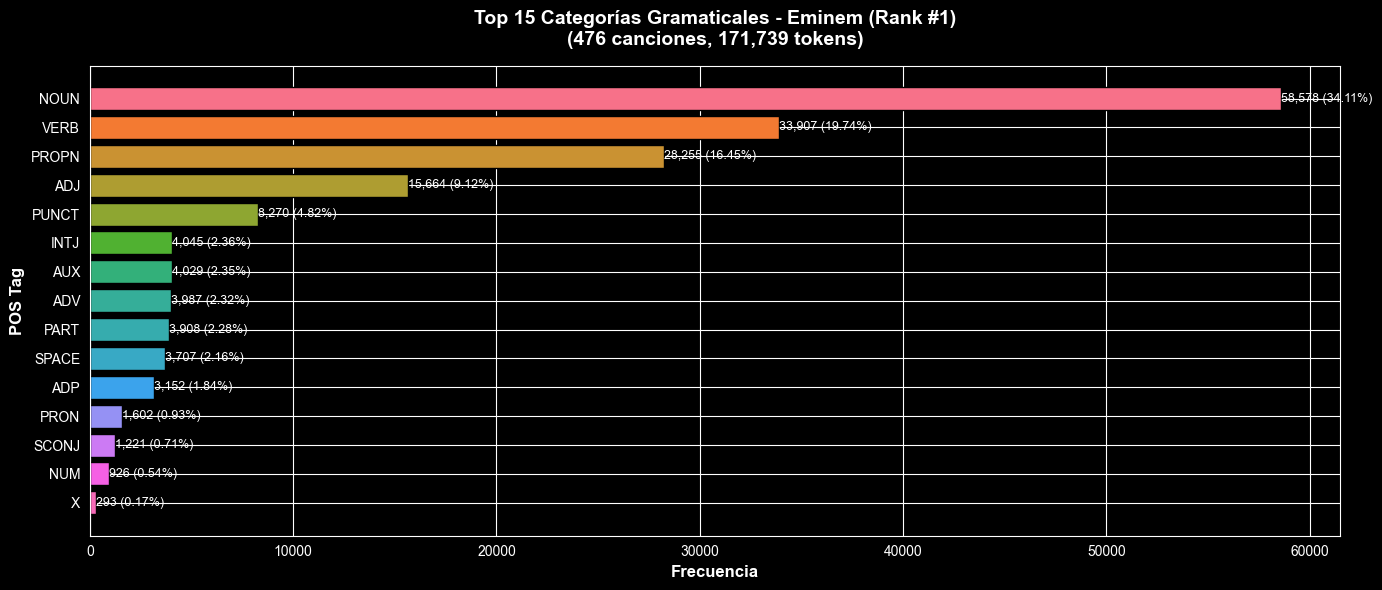

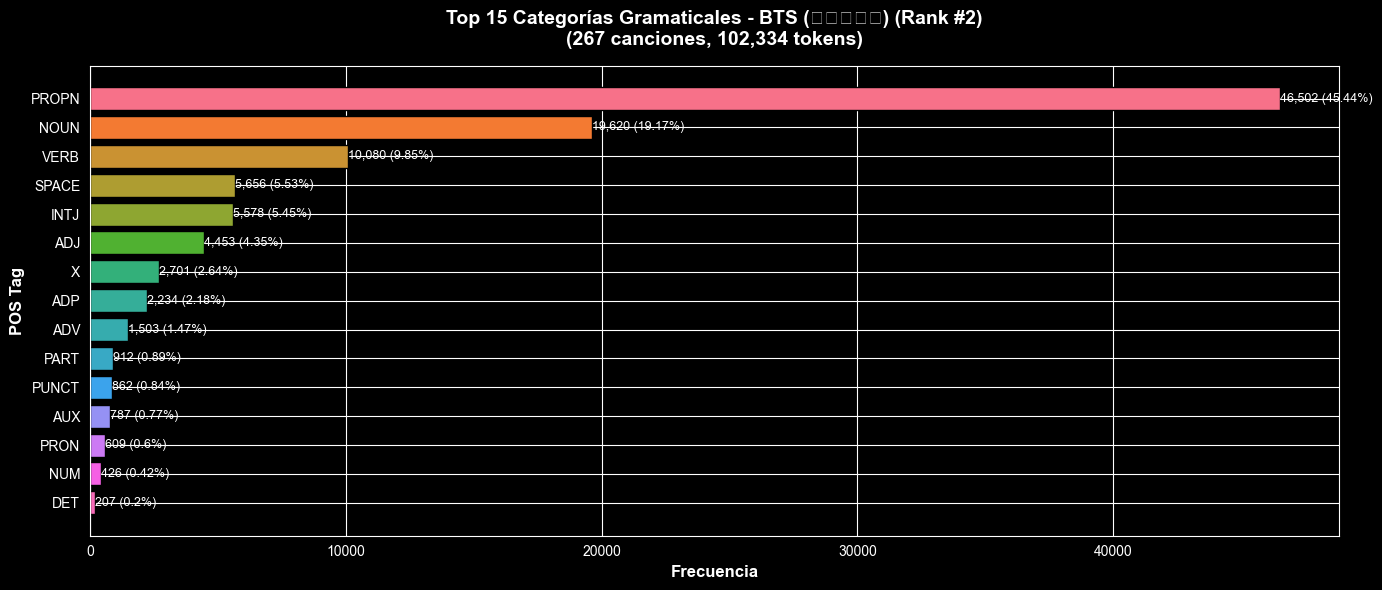

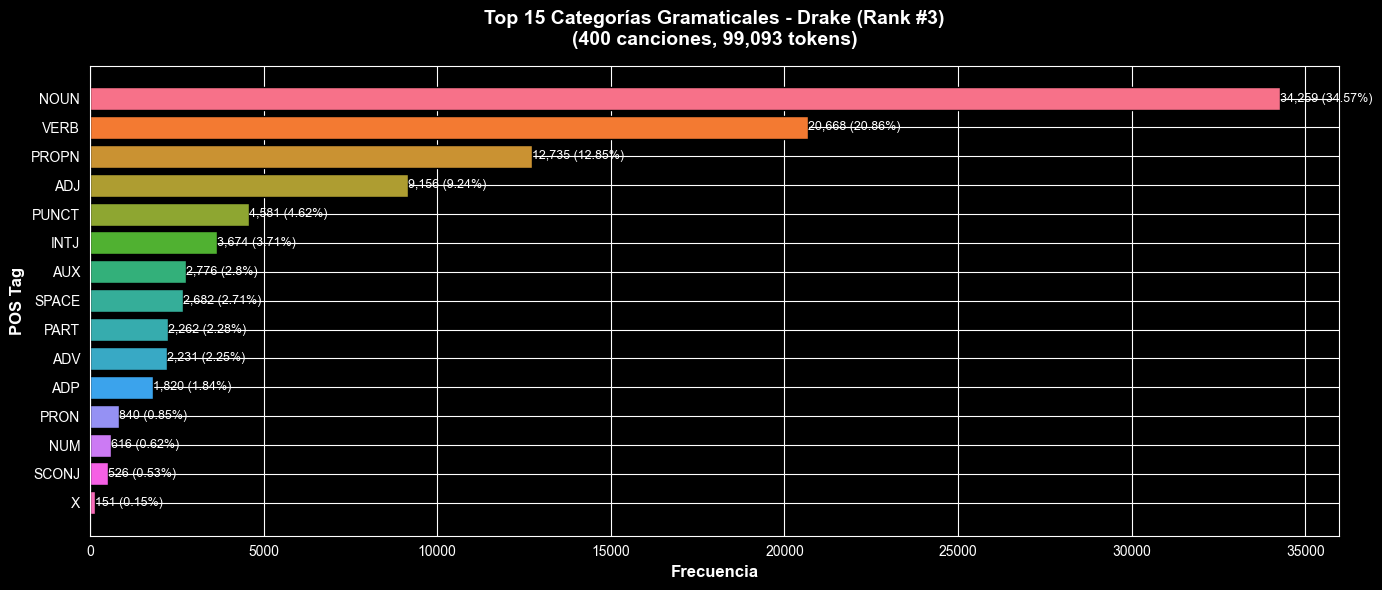

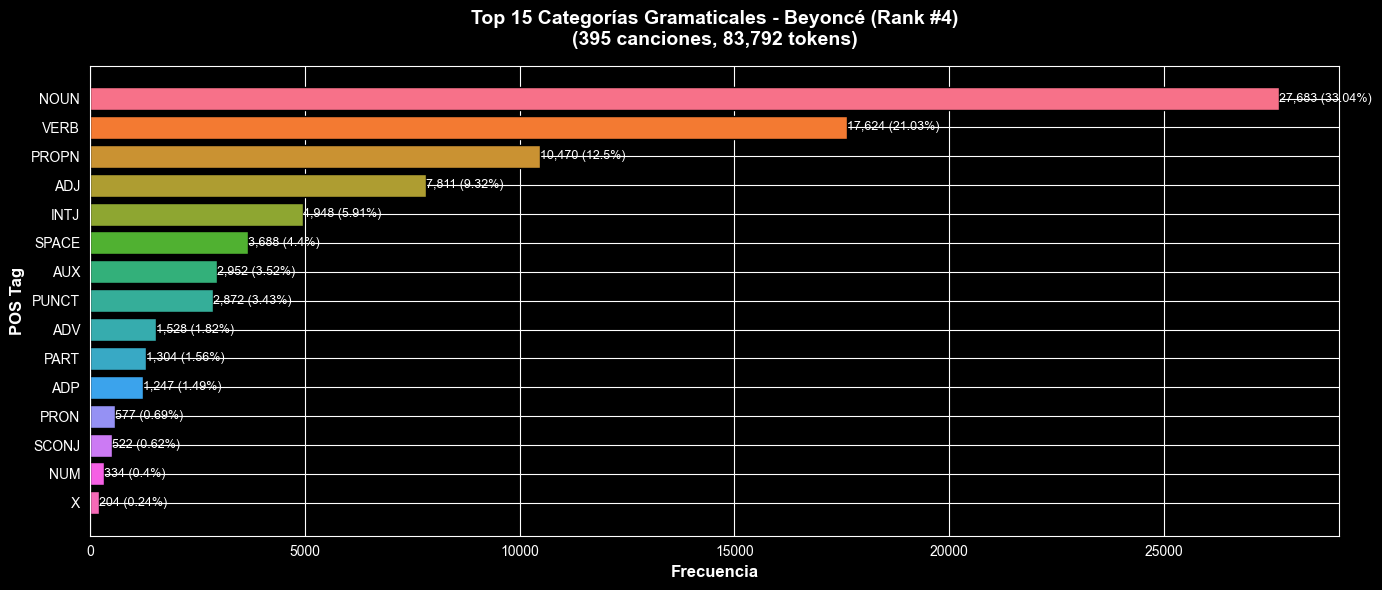

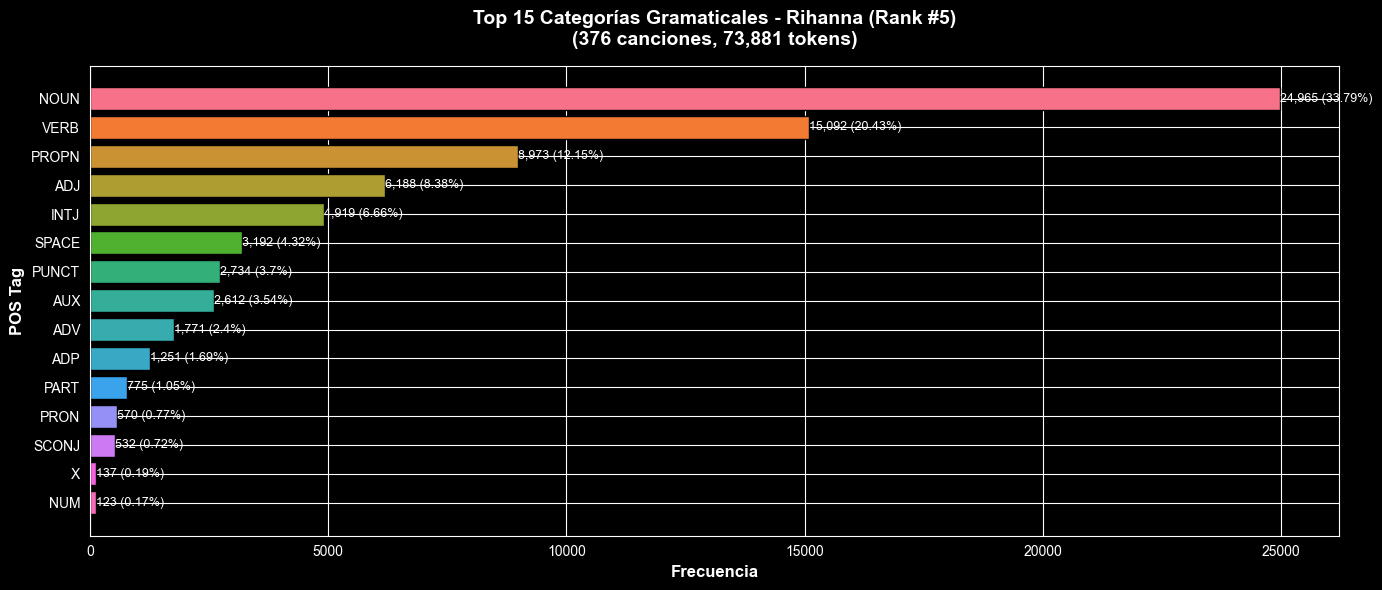

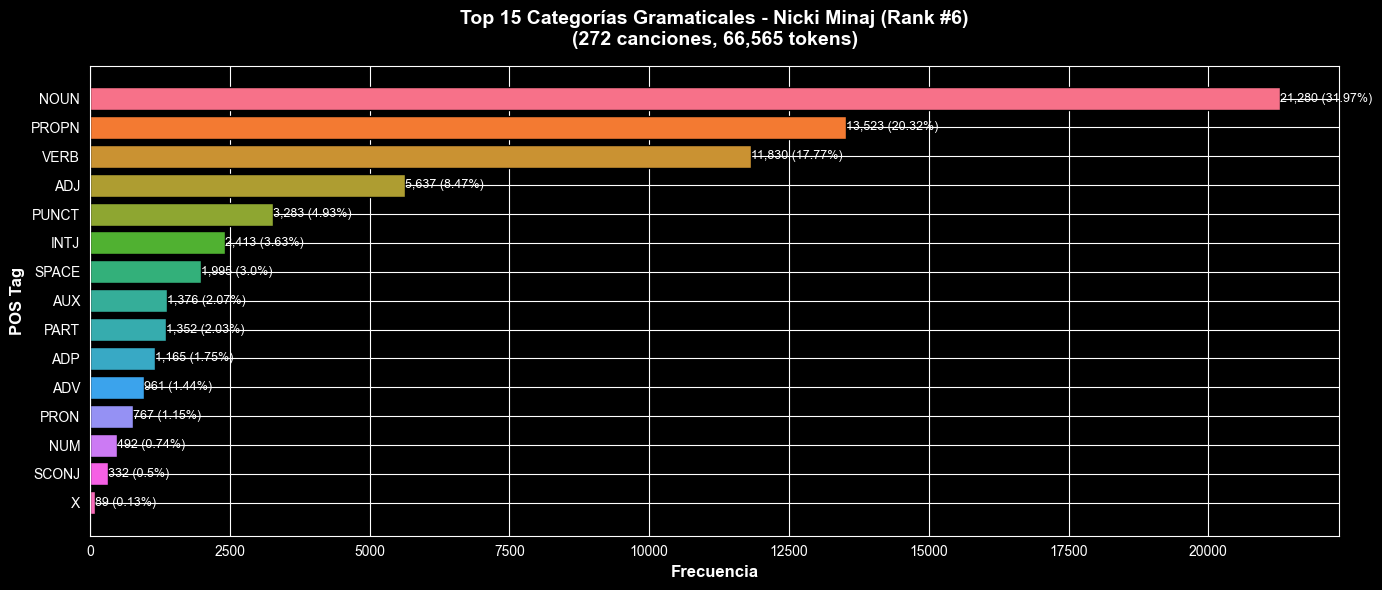

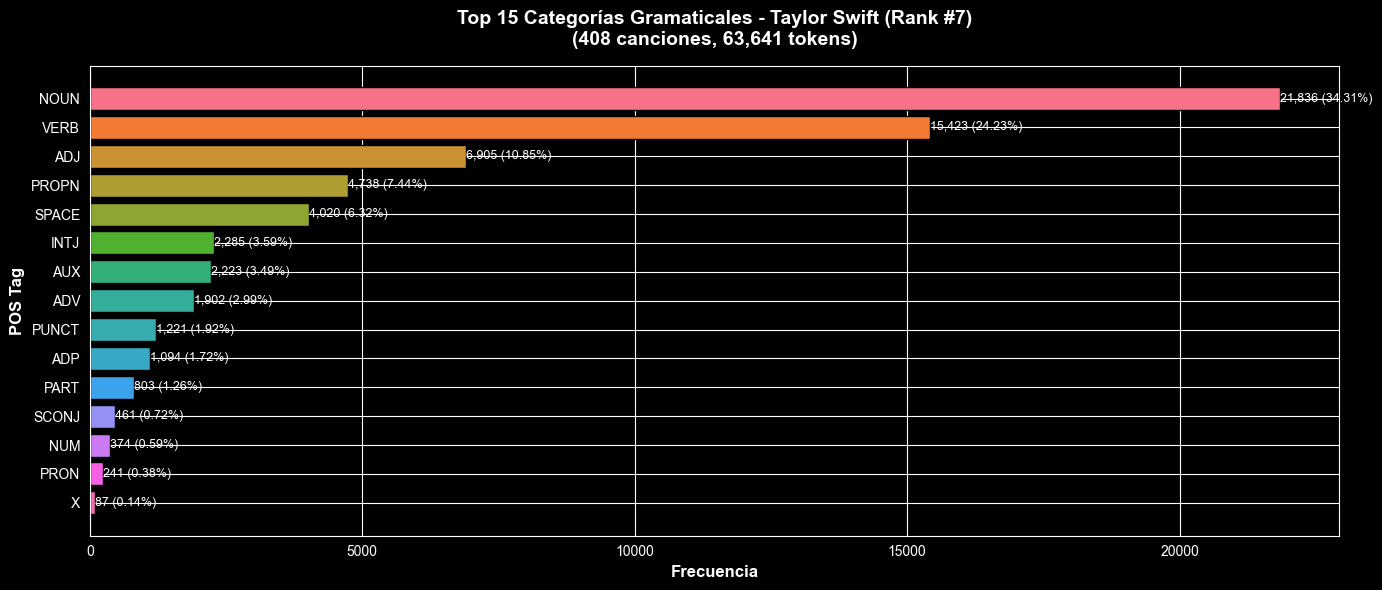

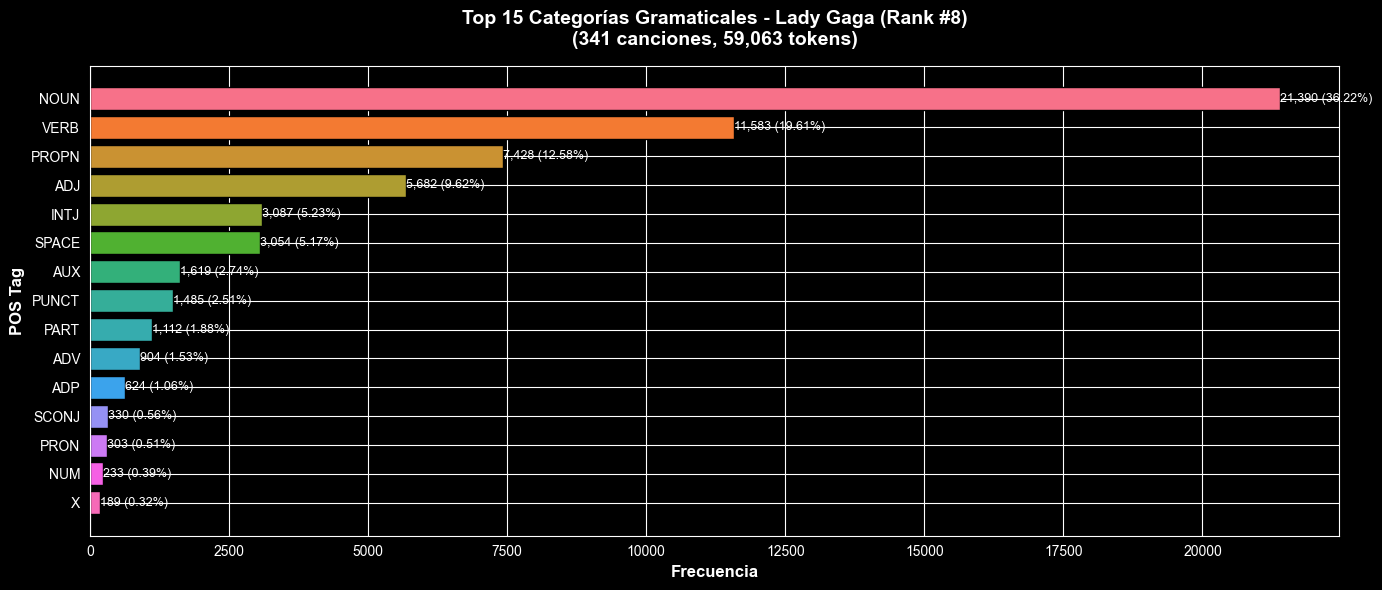

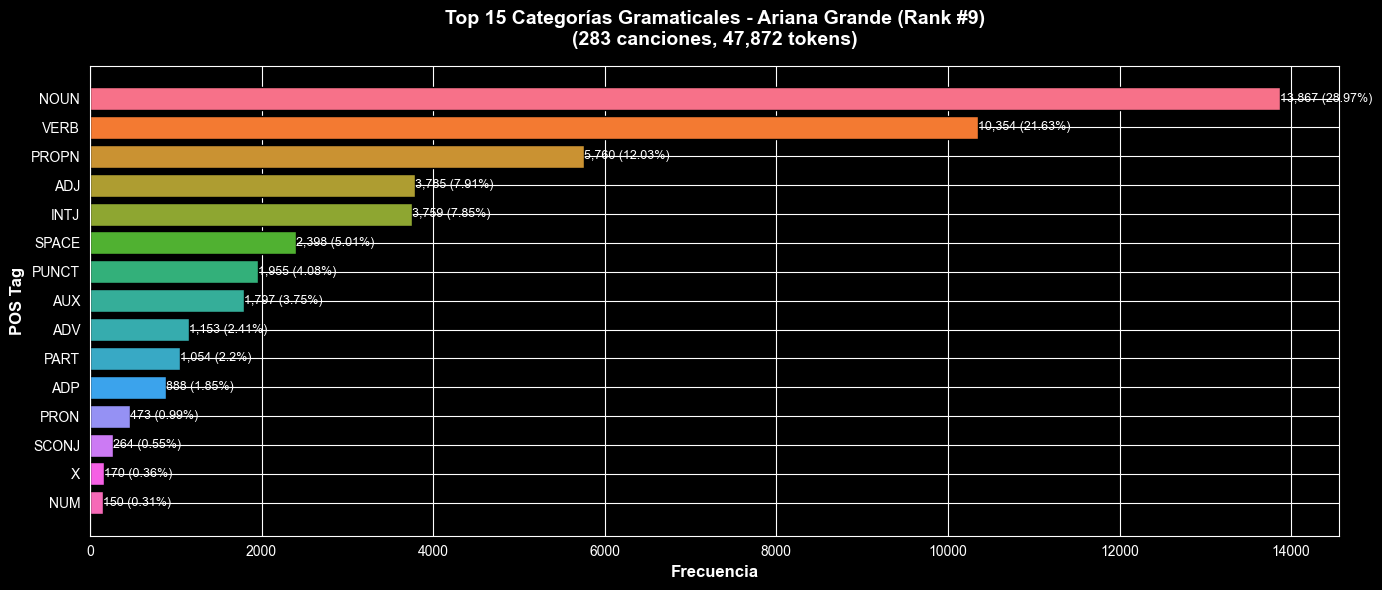

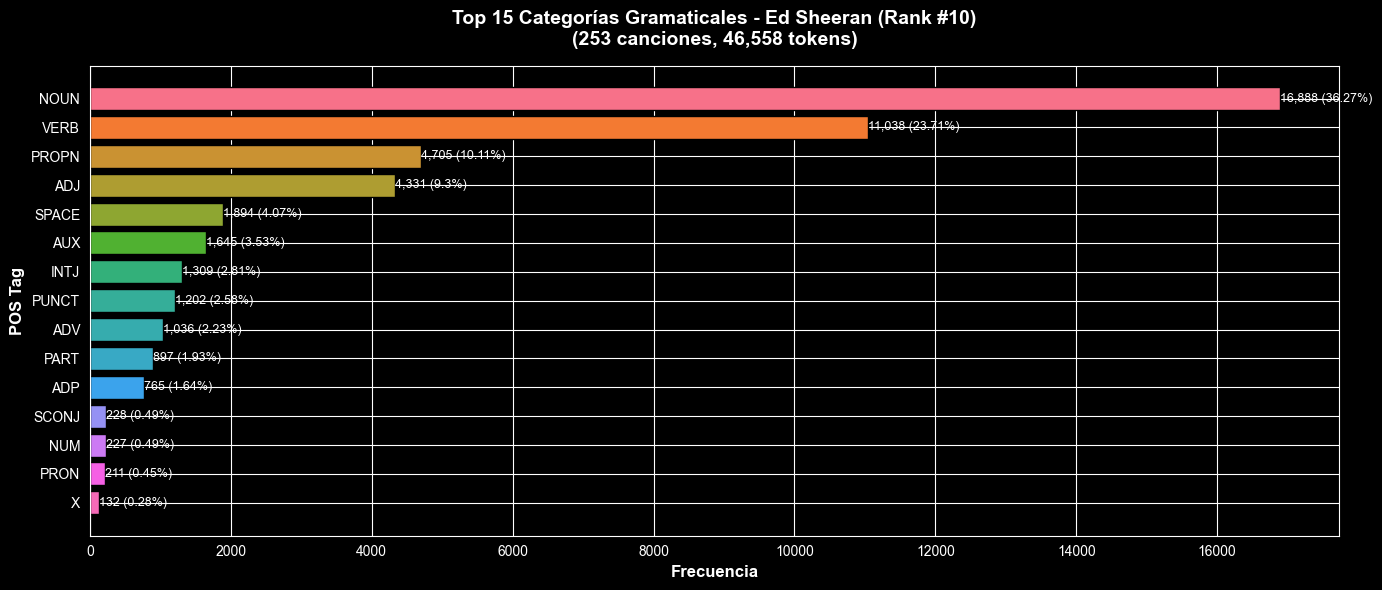

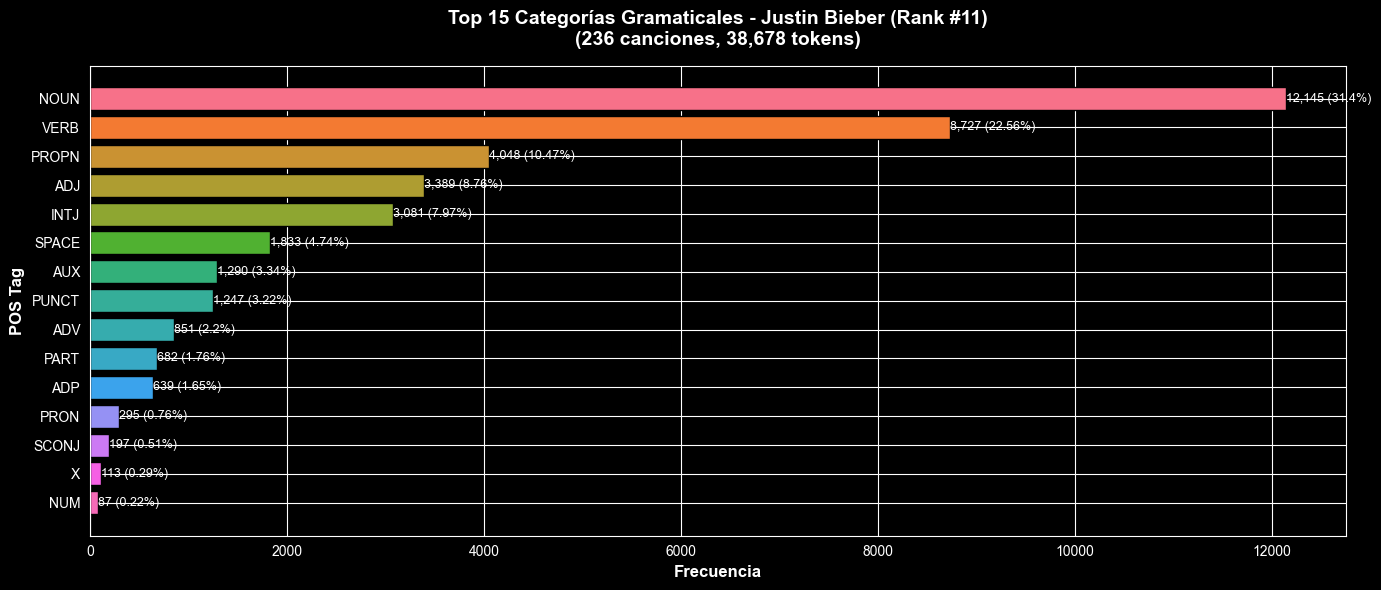

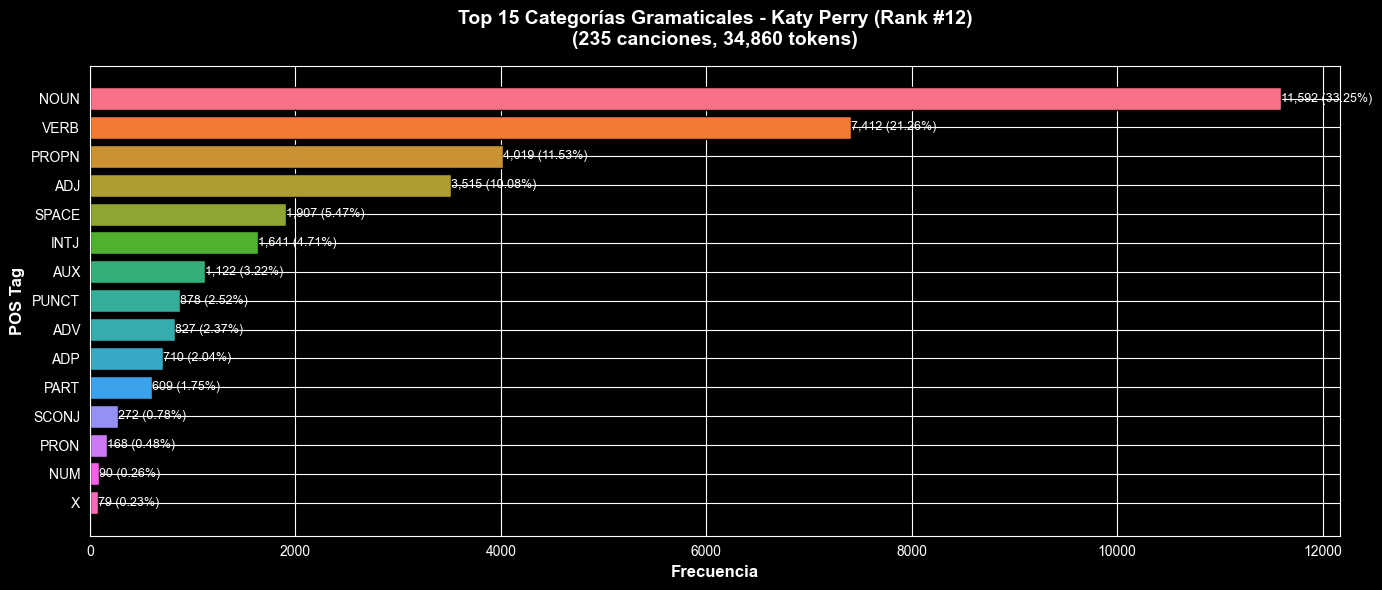

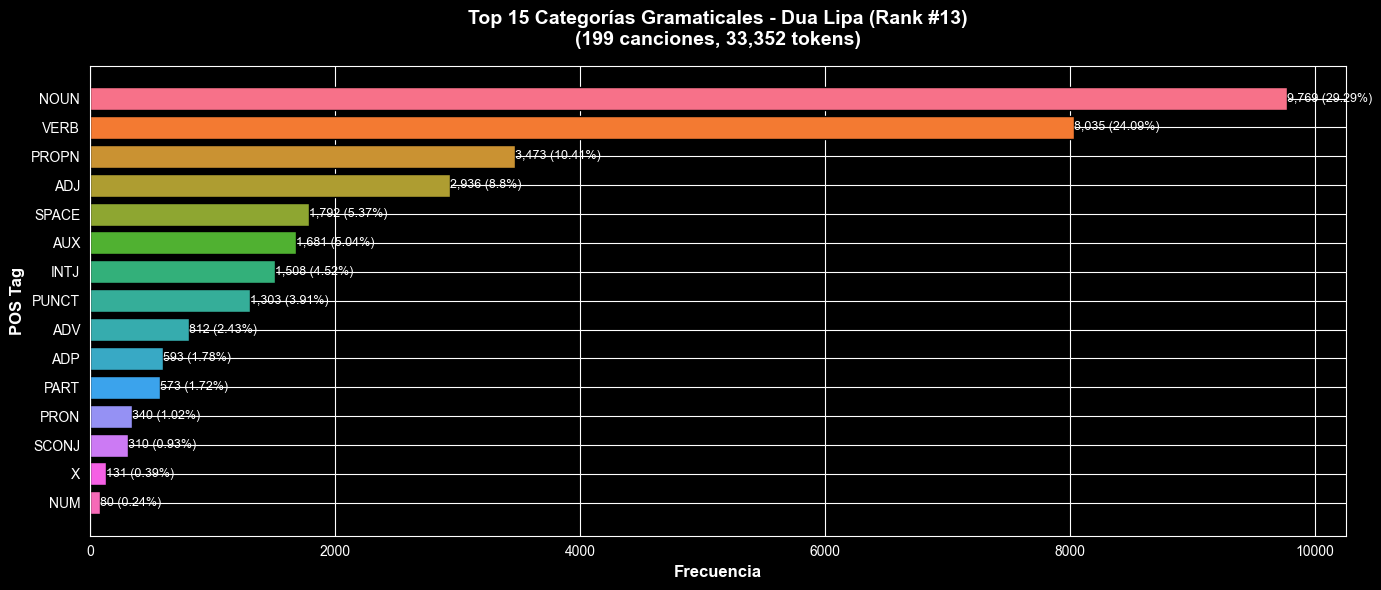

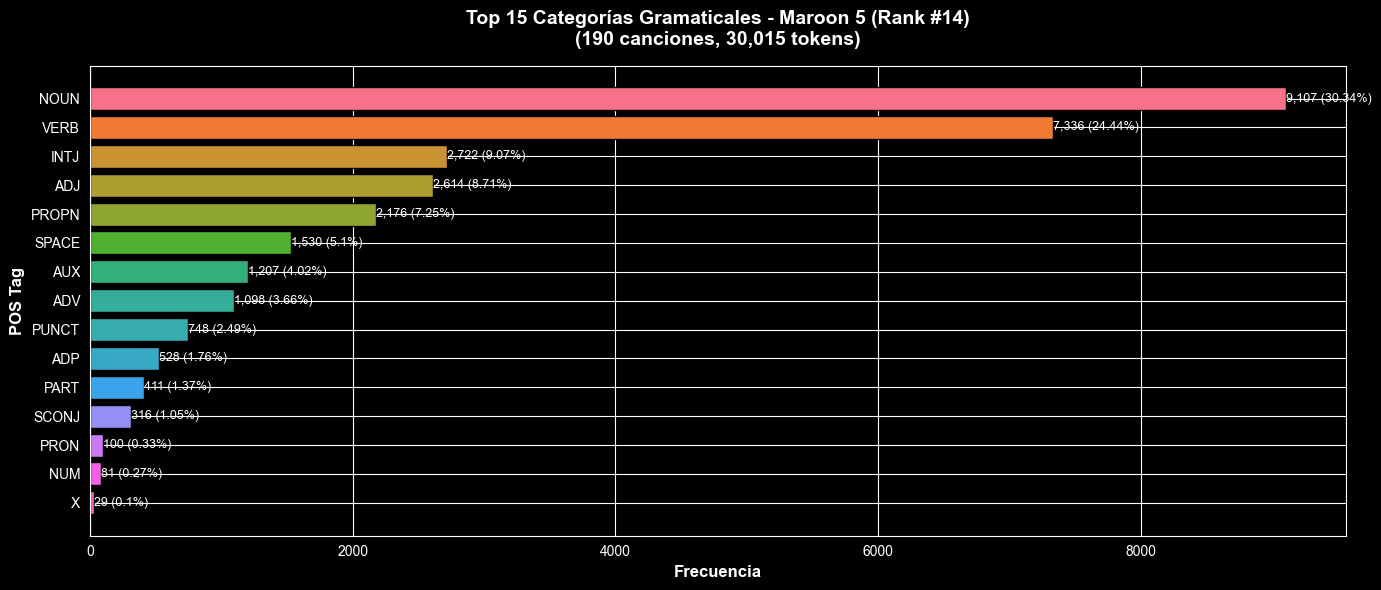

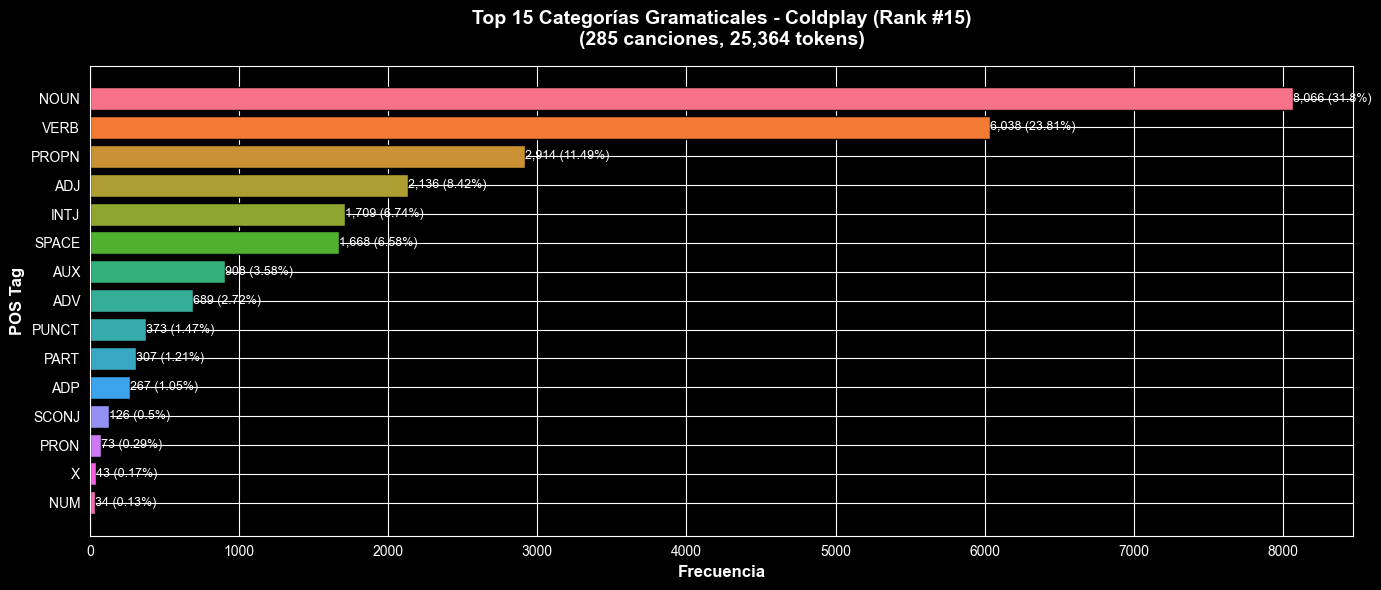

In [13]:
# Primero, calcular el ranking de artistas por número total de tokens
ranking_artistas = []
for artista in artistas:
    total_tokens = resultados_por_artista[artista]['total_tokens']
    ranking_artistas.append((artista, total_tokens))

# Ordenar por total de tokens (descendente) y tomar top 15
ranking_artistas.sort(key=lambda x: x[1], reverse=True)
top_15_artistas = [artista for artista, _ in ranking_artistas[:15]]

print(f"Mostrando Top 15 artistas (de {len(artistas)} totales)")
print(f"Top 15: {top_15_artistas}\n")

# Visualización COMPARATIVA: Top 15 POS Tags solo para Top 15 artistas
for idx, artista in enumerate(top_15_artistas):
    # Crear figura individual para cada artista
    fig, ax = plt.subplots(1, 1, figsize=(14, 6))

    pos_df = resultados_por_artista[artista]['pos_df']
    top_15 = pos_df.head(15)

    bars = ax.barh(top_15['POS_Tag'], top_15['Frecuencia'],
                   color=sns.color_palette('husl', 15), edgecolor='black')

    # Añadir valores en las barras
    for i, bar in enumerate(bars):
        width = bar.get_width()
        ax.text(width, bar.get_y() + bar.get_height()/2,
                f'{int(width):,} ({top_15.iloc[i]["Porcentaje"]}%)',
                ha='left', va='center', fontsize=9)

    ax.set_xlabel('Frecuencia', fontsize=12, fontweight='bold')
    ax.set_ylabel('POS Tag', fontsize=12, fontweight='bold')
    ax.set_title(f'Top 15 Categorías Gramaticales - {artista} (Rank #{idx+1})\n'
                 f'({resultados_por_artista[artista]["num_canciones"]} canciones, '
                 f'{resultados_por_artista[artista]["total_tokens"]:,} tokens)',
                 fontsize=14, fontweight='bold', pad=15)
    ax.invert_yaxis()

    plt.tight_layout()
    plt.show()
    plt.close(fig)  # Liberar memoria

In [14]:
# Obtener lista de géneros únicos
generos = df['Genero'].unique()
print(f"Géneros a analizar: {list(generos)}")

# Crear diccionario para almacenar resultados por género
resultados_por_genero = {}

for genero in generos:
    # Filtrar datos del género
    df_genero = df[df['Genero'] == genero]

    # Extraer POS tags del género
    pos_tags_genero = [tag for tags_list in df_genero['pos_list'] for tag in tags_list]

    # Contar frecuencias
    pos_counts = Counter(pos_tags_genero)
    pos_df = pd.DataFrame(pos_counts.most_common(), columns=['POS_Tag', 'Frecuencia'])
    pos_df['Porcentaje'] = (pos_df['Frecuencia'] / pos_df['Frecuencia'].sum() * 100).round(2)

    # Guardar en diccionario
    resultados_por_genero[genero] = {
        'pos_df': pos_df,
        'total_tokens': len(pos_tags_genero),
        'num_canciones': len(df_genero)
    }

    print(f"\n{'='*60}")
    print(f"Género: {genero}")
    print(f"Total tokens: {len(pos_tags_genero):,}")
    print(f"Número de canciones: {len(df_genero)}")
    print(f"\nTop 10 POS Tags:")
    print(pos_df.head(10))

Géneros a analizar: ['pop', 'alternative pop', 'K-pop', 'hip hop', 'alternative rock', 'dance-pop', 'r&b']

Género: pop
Total tokens: 511,084
Número de canciones: 2943

Top 10 POS Tags:
  POS_Tag  Frecuencia  Porcentaje
0    NOUN      169029       33.07
1    VERB      111967       21.91
2   PROPN       55828       10.92
3     ADJ       47541        9.30
4    INTJ       29614        5.79
5   SPACE       25332        4.96
6     AUX       17792        3.48
7   PUNCT       15527        3.04
8     ADV       12078        2.36
9     ADP        8250        1.61

Género: alternative pop
Total tokens: 13,405
Número de canciones: 132

Top 10 POS Tags:
  POS_Tag  Frecuencia  Porcentaje
0    NOUN        4355       32.49
1    VERB        3132       23.36
2     ADJ        1343       10.02
3   PROPN        1257        9.38
4   SPACE         809        6.04
5   PUNCT         494        3.69
6     AUX         483        3.60
7    INTJ         464        3.46
8     ADV         393        2.93
9     ADP  

In [15]:
# Ranking de géneros por número total de tokens
ranking_generos = []
for genero in generos:
    total_tokens = resultados_por_genero[genero]['total_tokens']
    ranking_generos.append((genero, total_tokens))

ranking_generos.sort(key=lambda x: x[1], reverse=True)
generos_ordenados = [genero for genero, _ in ranking_generos]

print(f"Total géneros: {len(generos_ordenados)}")

Total géneros: 7


In [17]:
# Obtener lista de años únicos ordenados
anios = sorted(df['Periodo'].dropna().unique())
print(f"Años a analizar: {list(anios)}")

# Crear diccionario para almacenar resultados por año
resultados_por_anio = {}

for anio in anios:
    # Filtrar datos del año
    df_anio = df[df['Periodo'] == anio]

    # Extraer POS tags del año
    pos_tags_anio = [tag for tags_list in df_anio['pos_list'] for tag in tags_list]

    # Contar frecuencias
    pos_counts = Counter(pos_tags_anio)
    pos_df = pd.DataFrame(pos_counts.most_common(), columns=['POS_Tag', 'Frecuencia'])
    pos_df['Porcentaje'] = (pos_df['Frecuencia'] / pos_df['Frecuencia'].sum() * 100).round(2)

    # Guardar en diccionario
    resultados_por_anio[anio] = {
        'pos_df': pos_df,
        'total_tokens': len(pos_tags_anio),
        'num_canciones': len(df_anio)
    }

    print(f"\n{'='*60}")
    print(f"Año: {int(anio)}")
    print(f"Total tokens: {len(pos_tags_anio):,}")
    print(f"Número de canciones: {len(df_anio)}")
    print(f"\nTop 10 POS Tags:")
    print(pos_df.head(10))

Años a analizar: [np.float64(1729.0), np.float64(1787.0), np.float64(1982.0), np.float64(1988.0), np.float64(1990.0), np.float64(1993.0), np.float64(1994.0), np.float64(1996.0), np.float64(1997.0), np.float64(1998.0), np.float64(1999.0), np.float64(2000.0), np.float64(2001.0), np.float64(2002.0), np.float64(2003.0), np.float64(2004.0), np.float64(2005.0), np.float64(2006.0), np.float64(2007.0), np.float64(2008.0), np.float64(2009.0), np.float64(2010.0), np.float64(2011.0), np.float64(2012.0), np.float64(2013.0), np.float64(2014.0), np.float64(2015.0), np.float64(2016.0), np.float64(2017.0), np.float64(2018.0), np.float64(2019.0), np.float64(2020.0), np.float64(2021.0), np.float64(2022.0), np.float64(2023.0), np.float64(2024.0), np.float64(2025.0), np.float64(2026.0)]

Año: 1729
Total tokens: 89
Número de canciones: 1

Top 10 POS Tags:
  POS_Tag  Frecuencia  Porcentaje
0    NOUN          34       38.20
1    VERB          17       19.10
2     ADJ          16       17.98
3   SPACE        

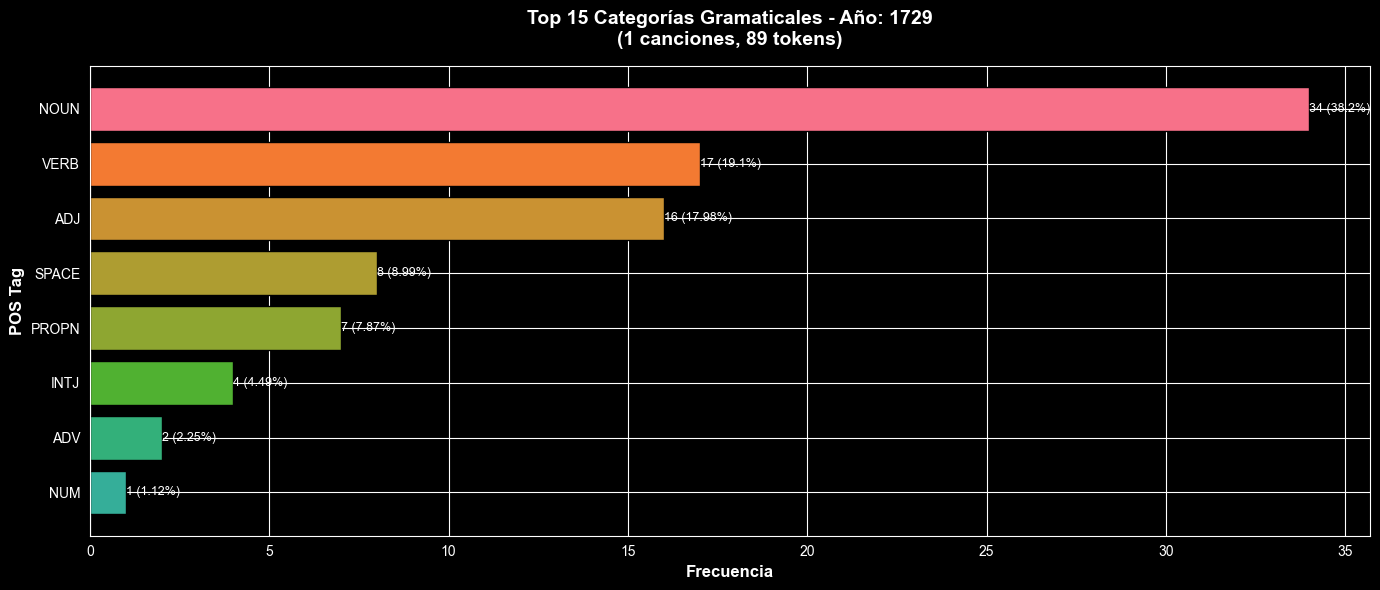

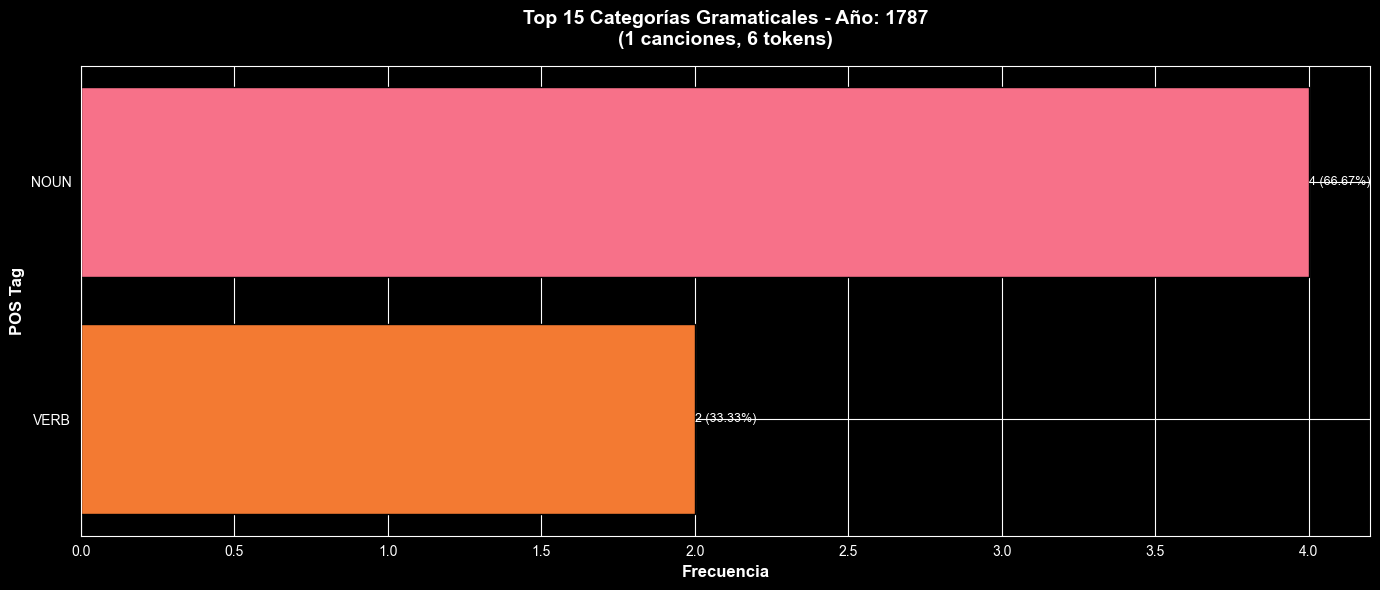

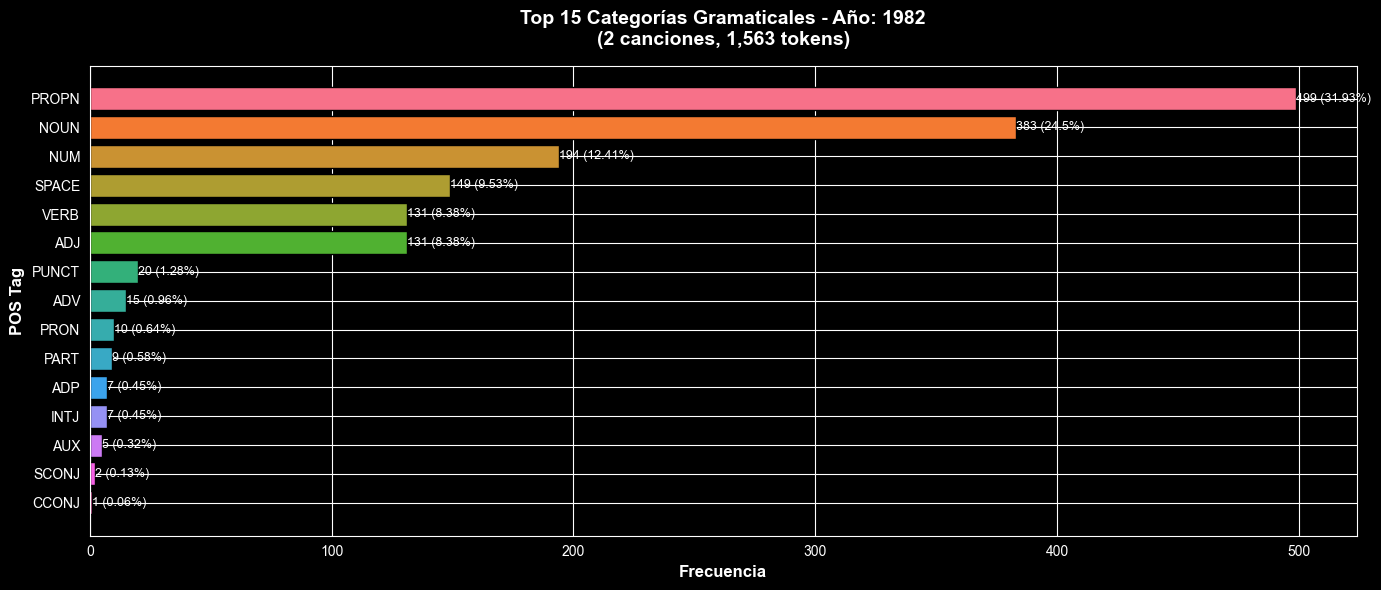

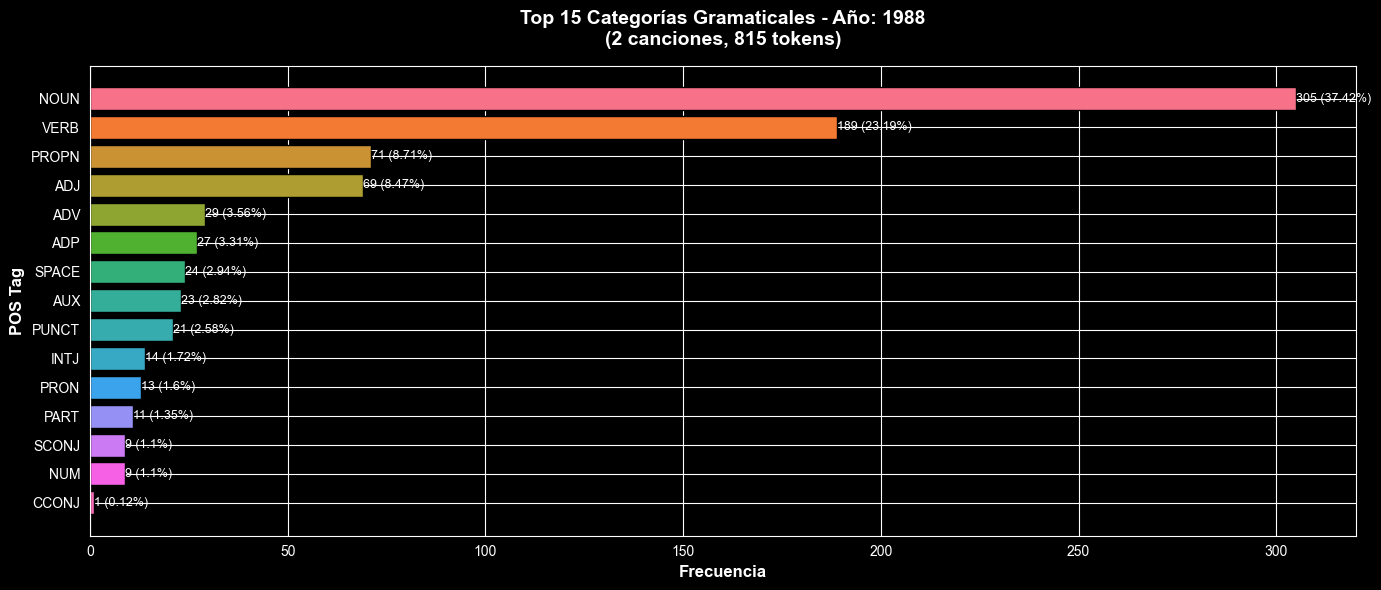

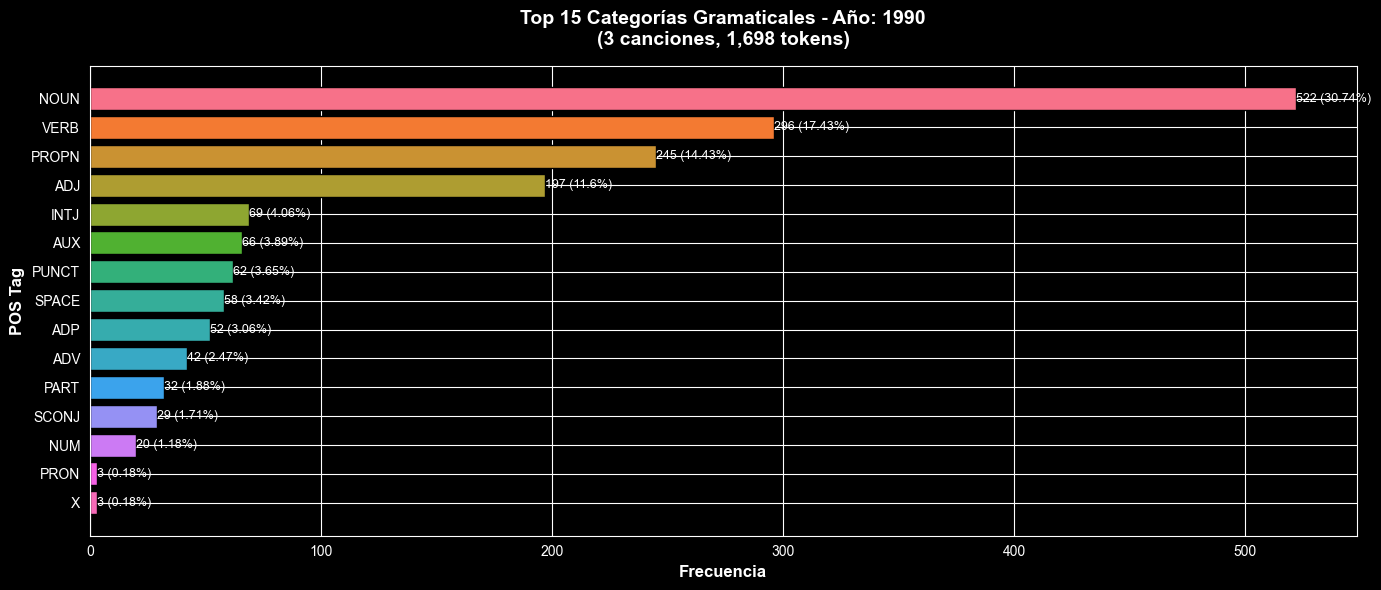

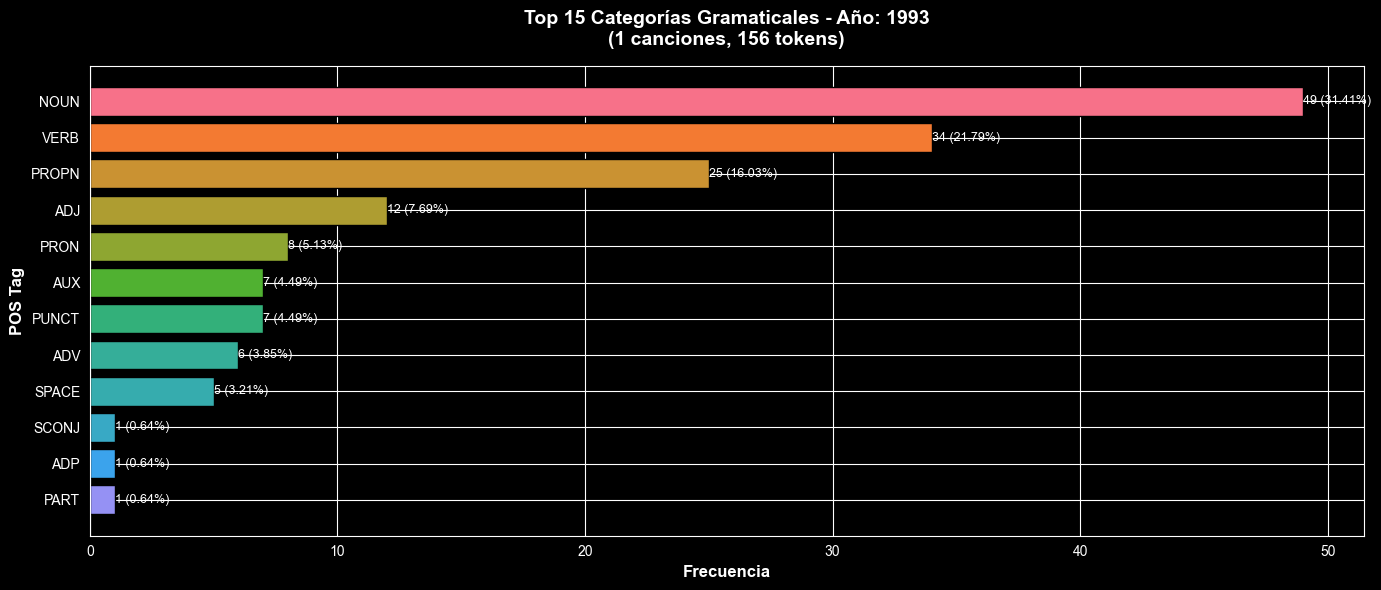

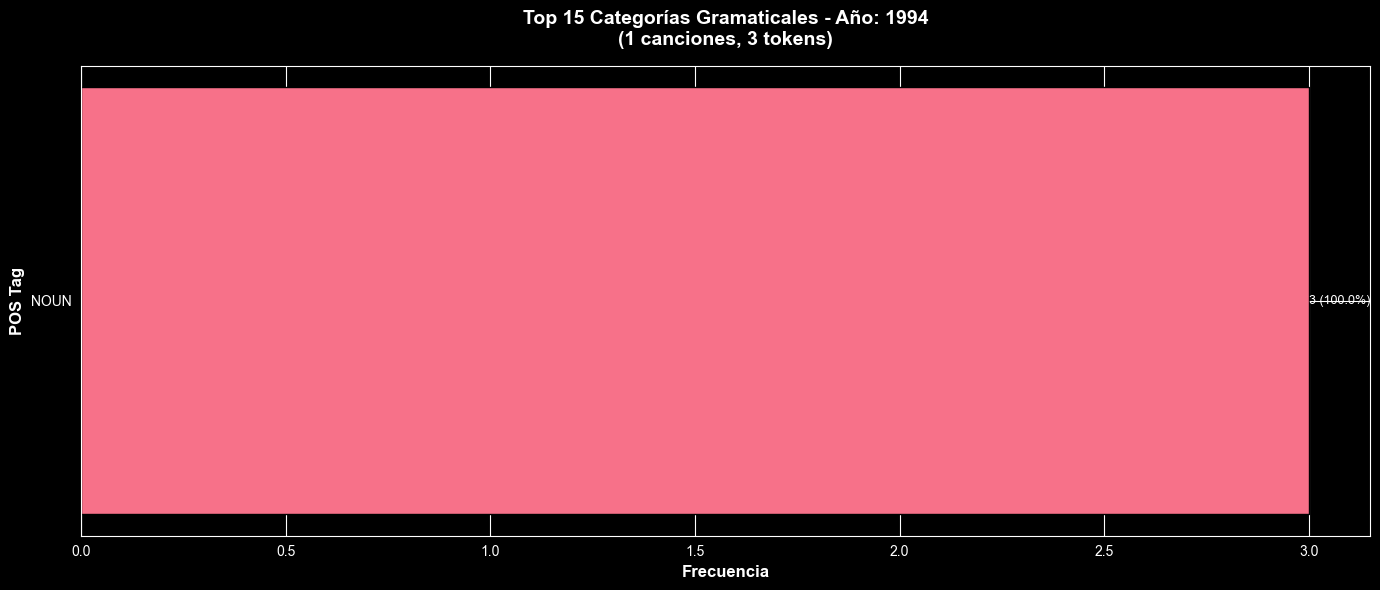

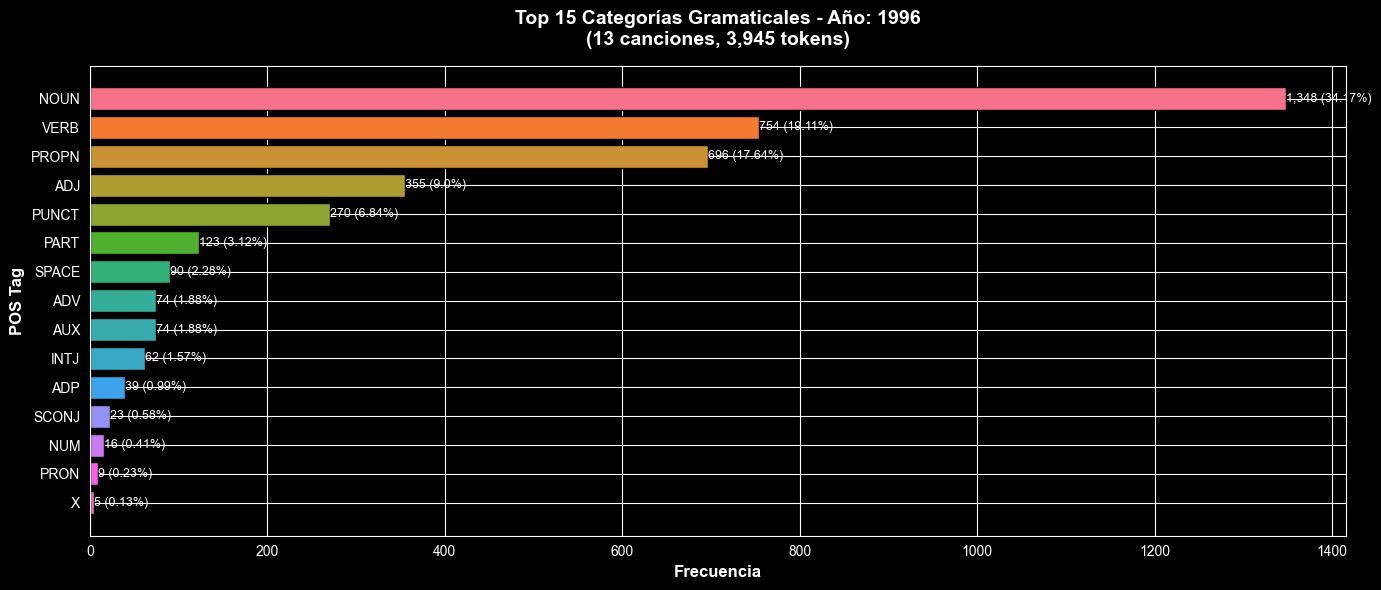

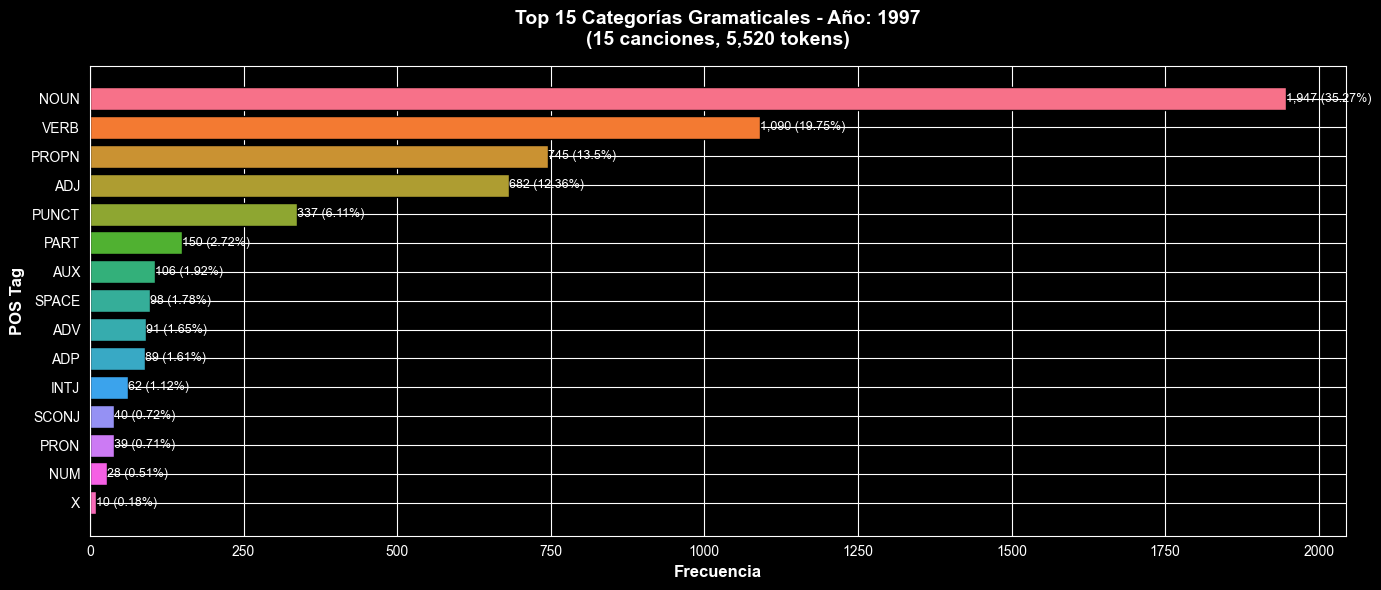

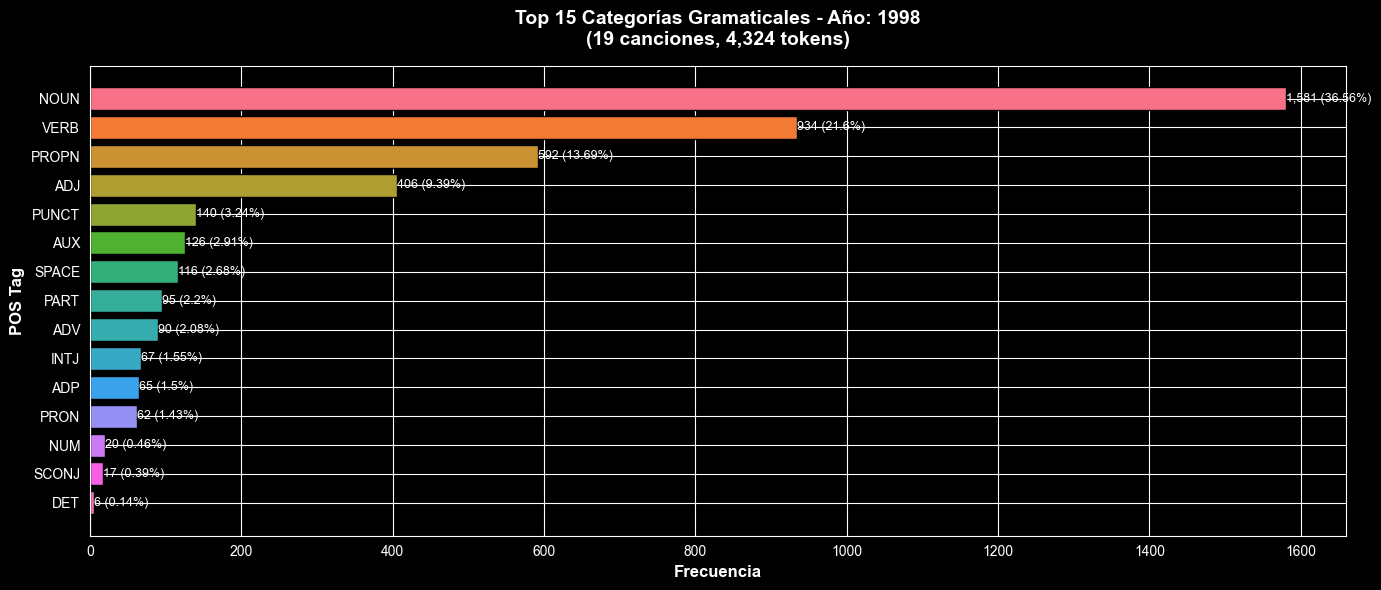

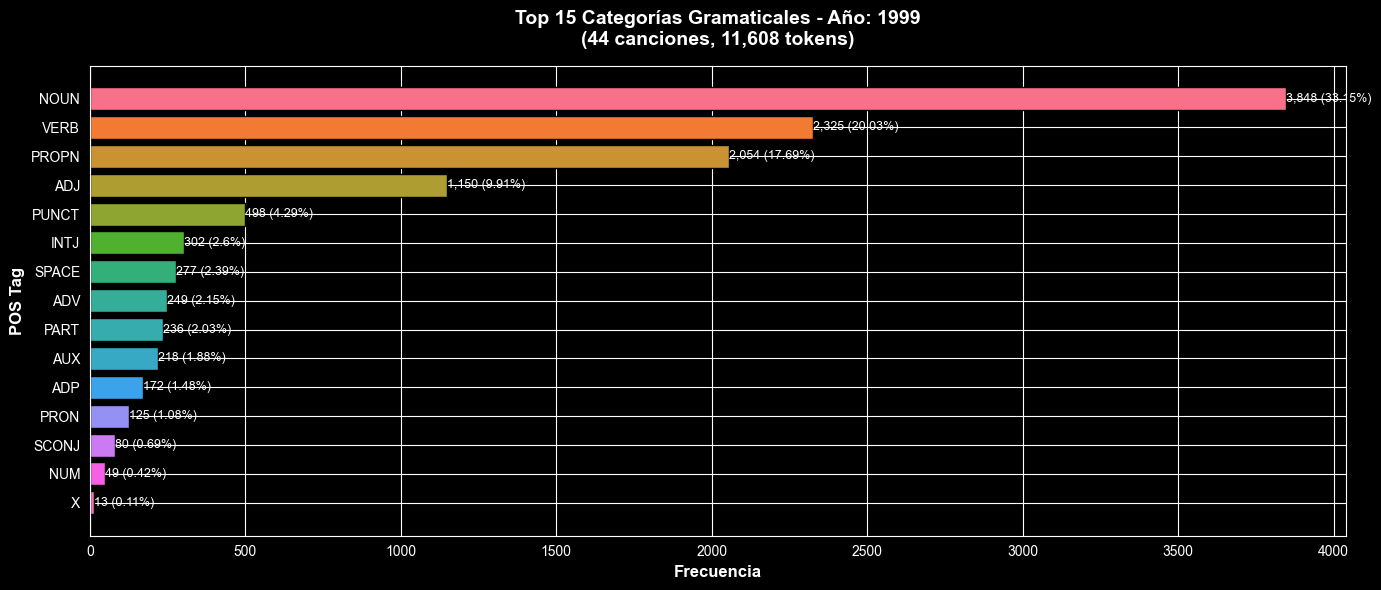

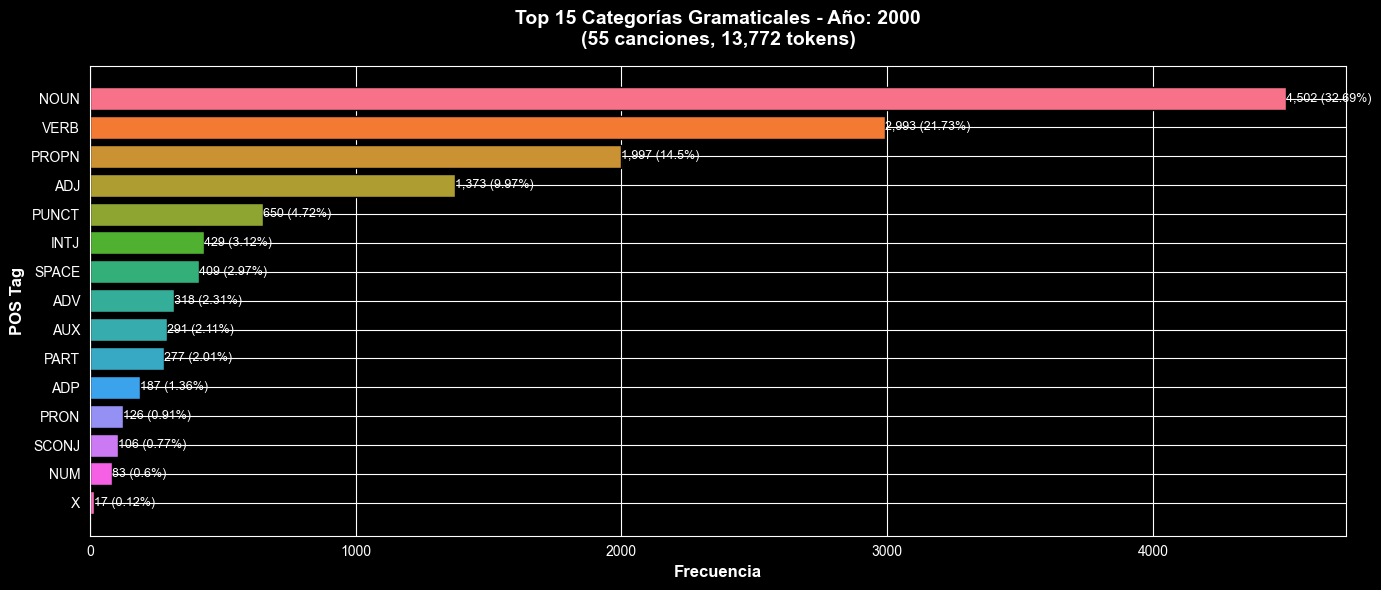

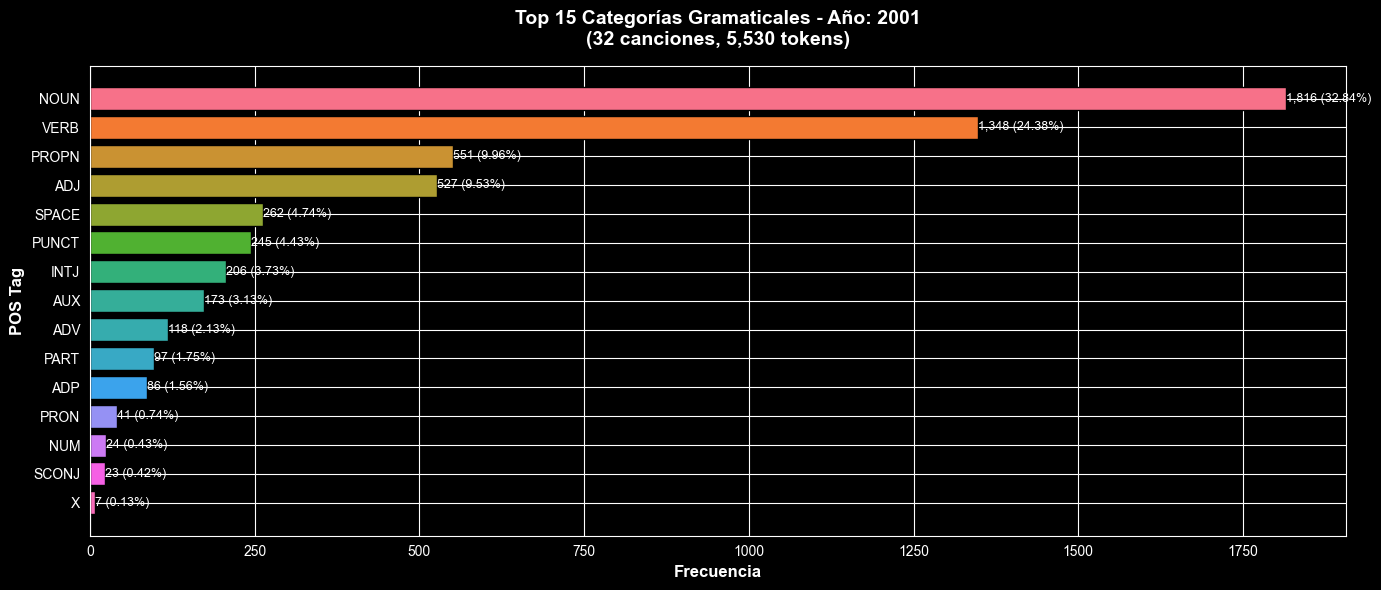

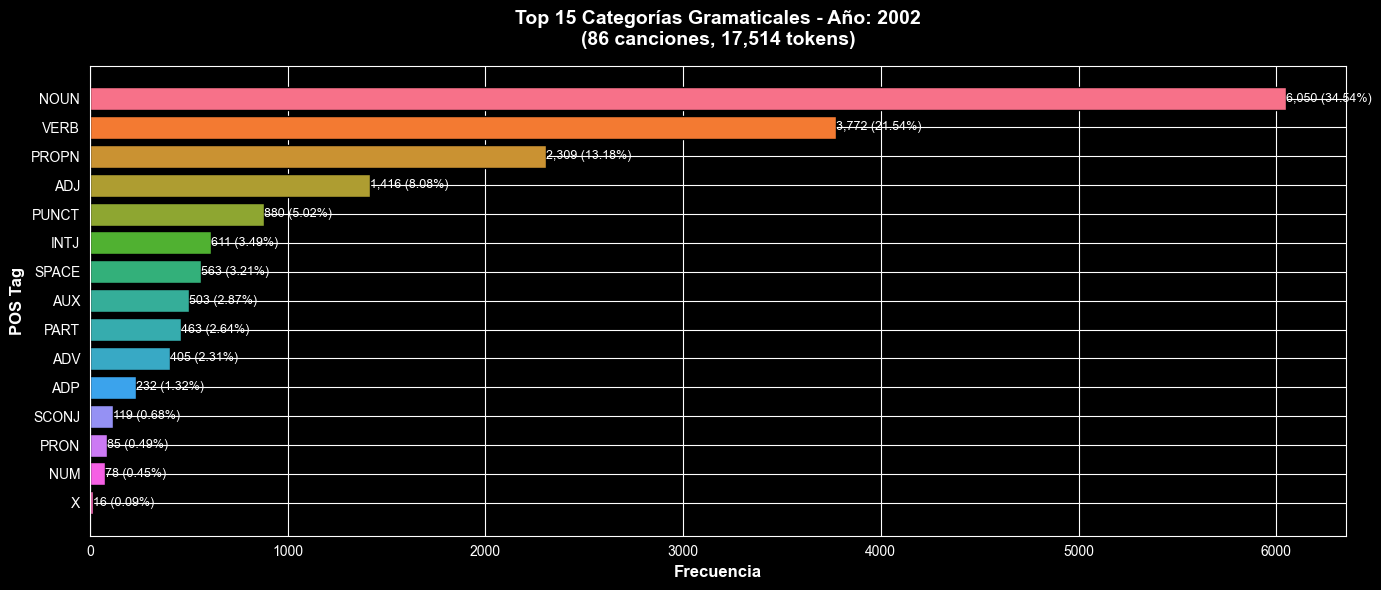

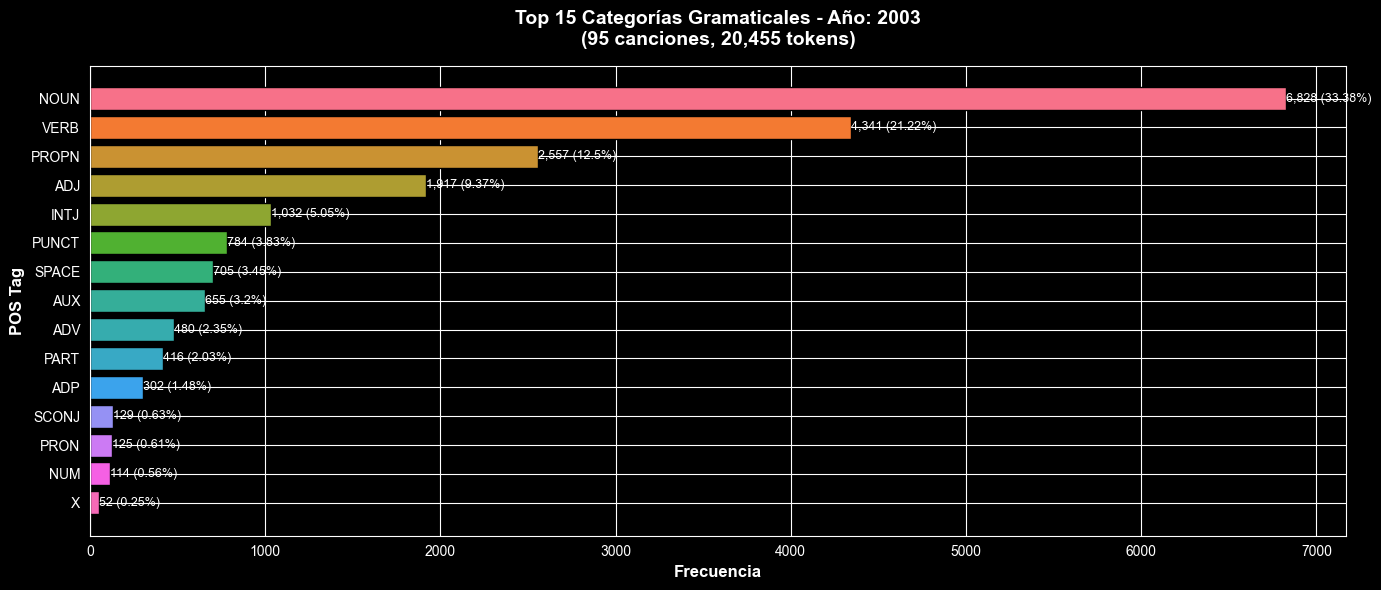

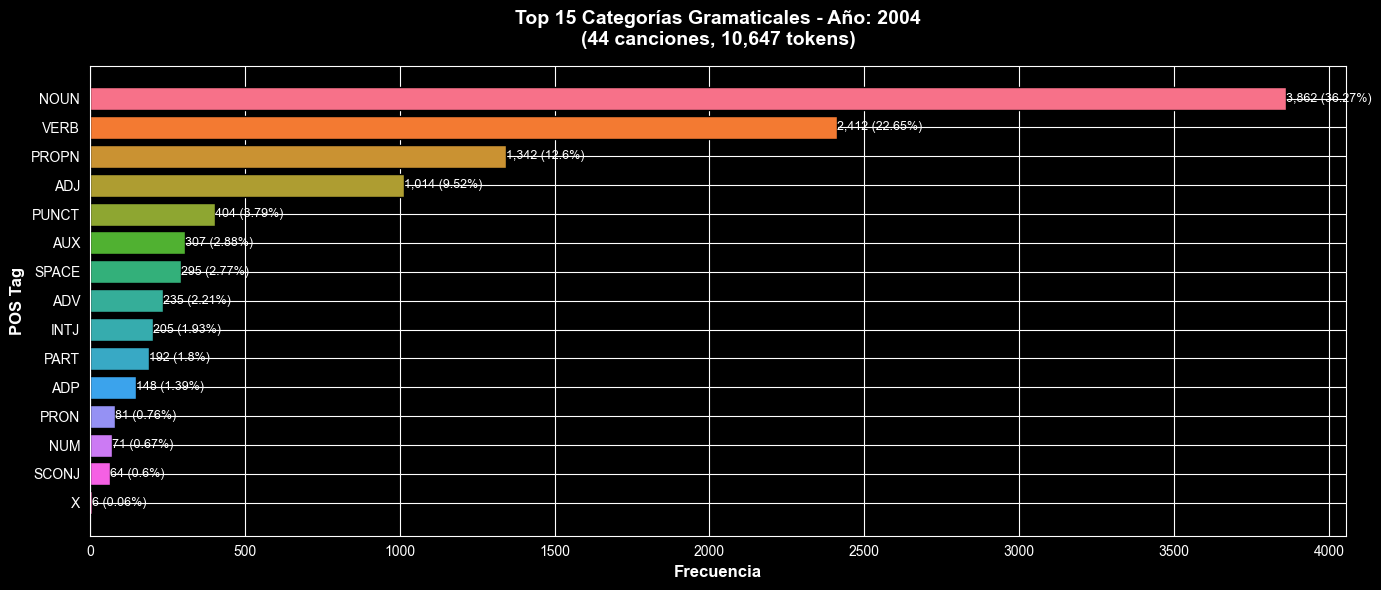

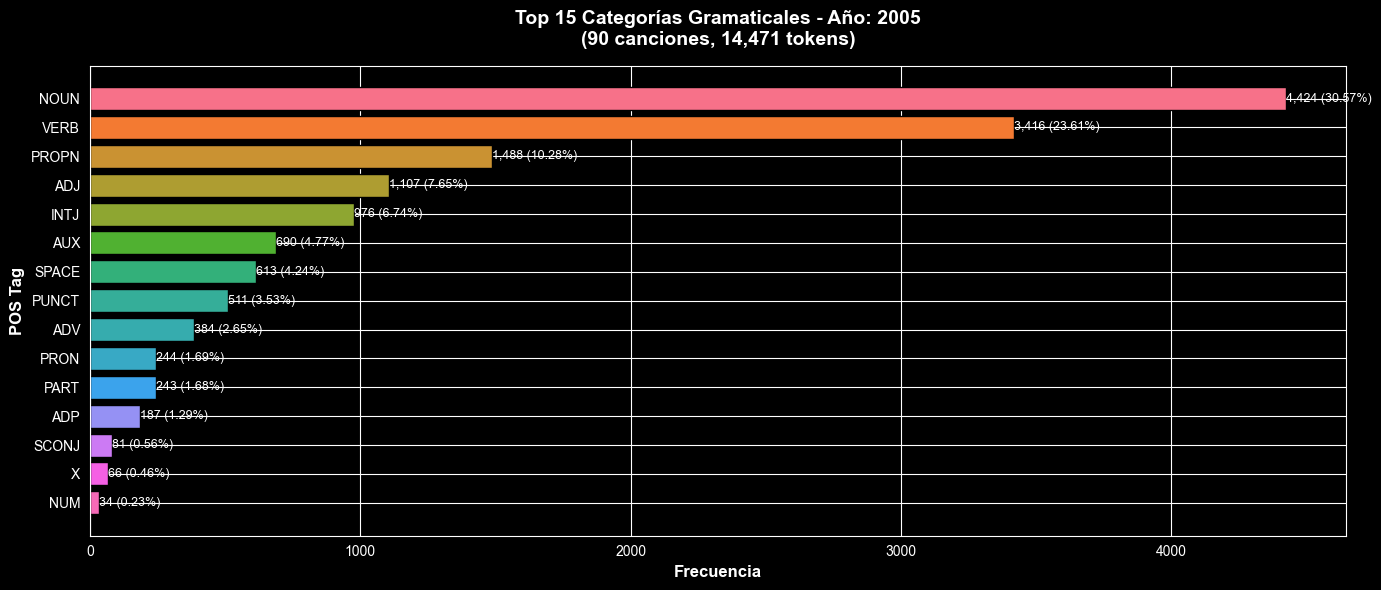

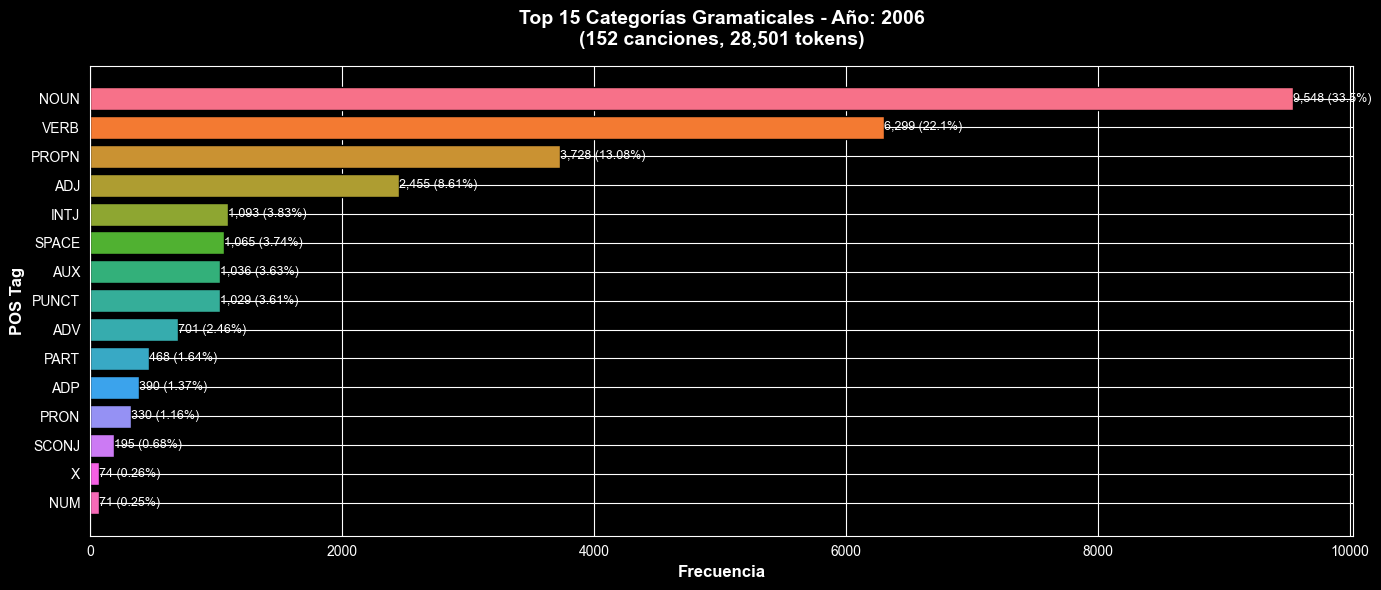

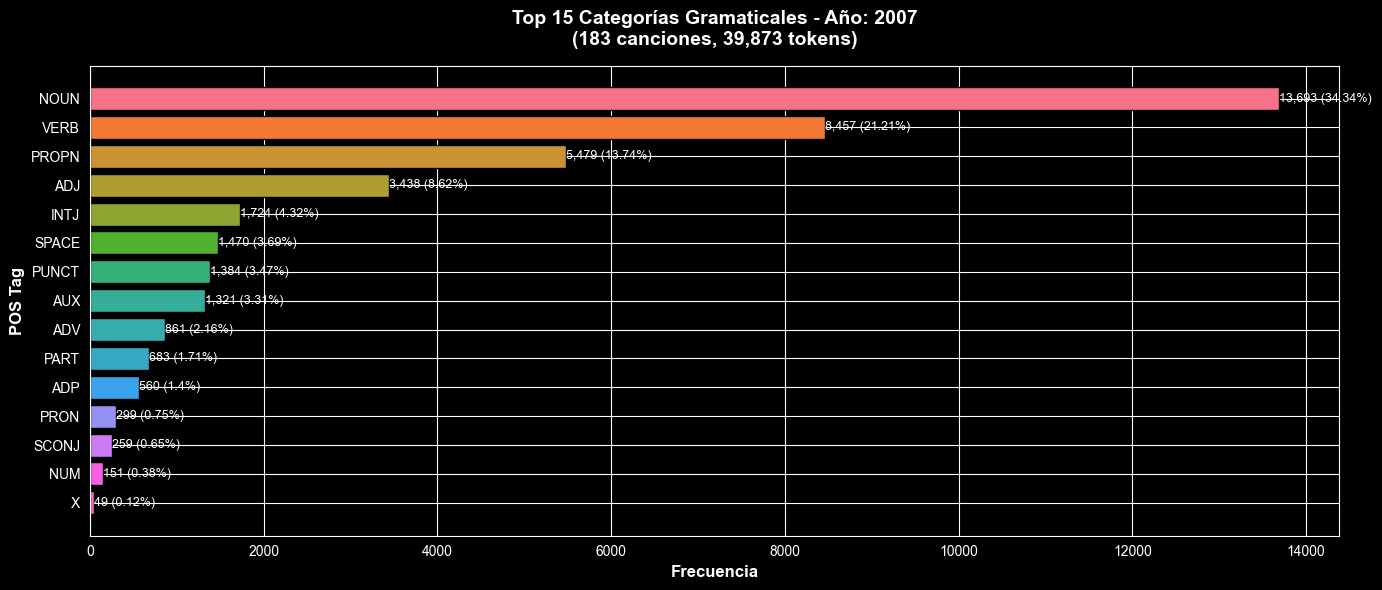

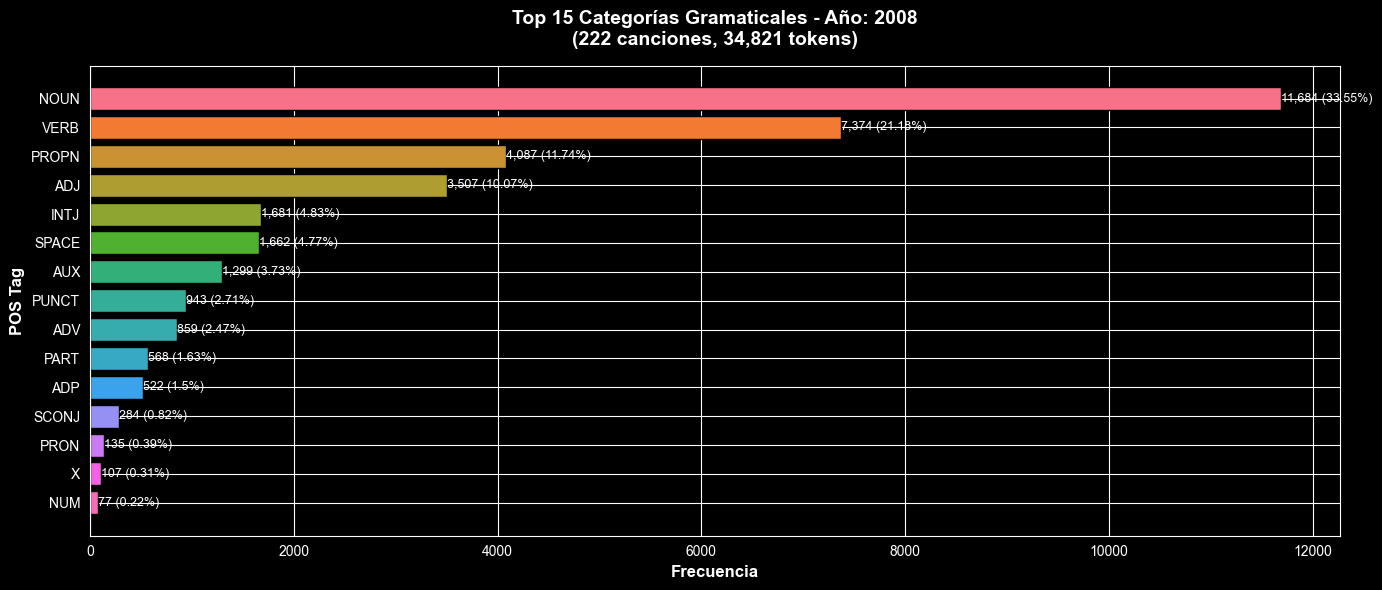

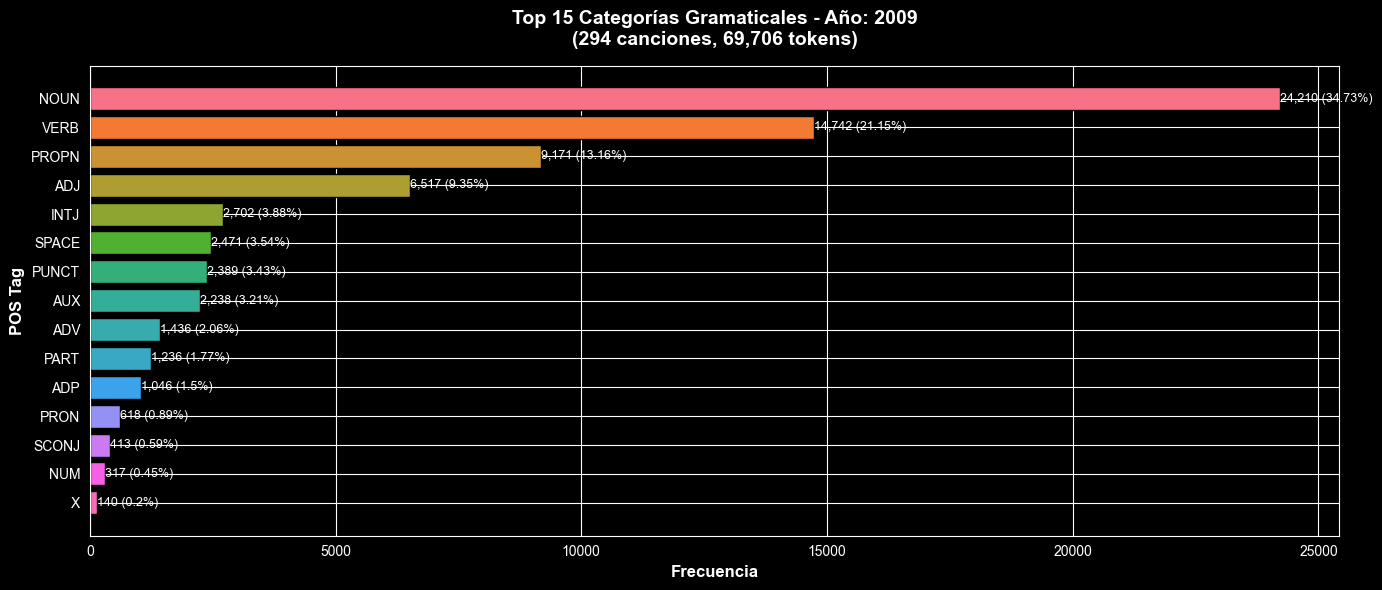

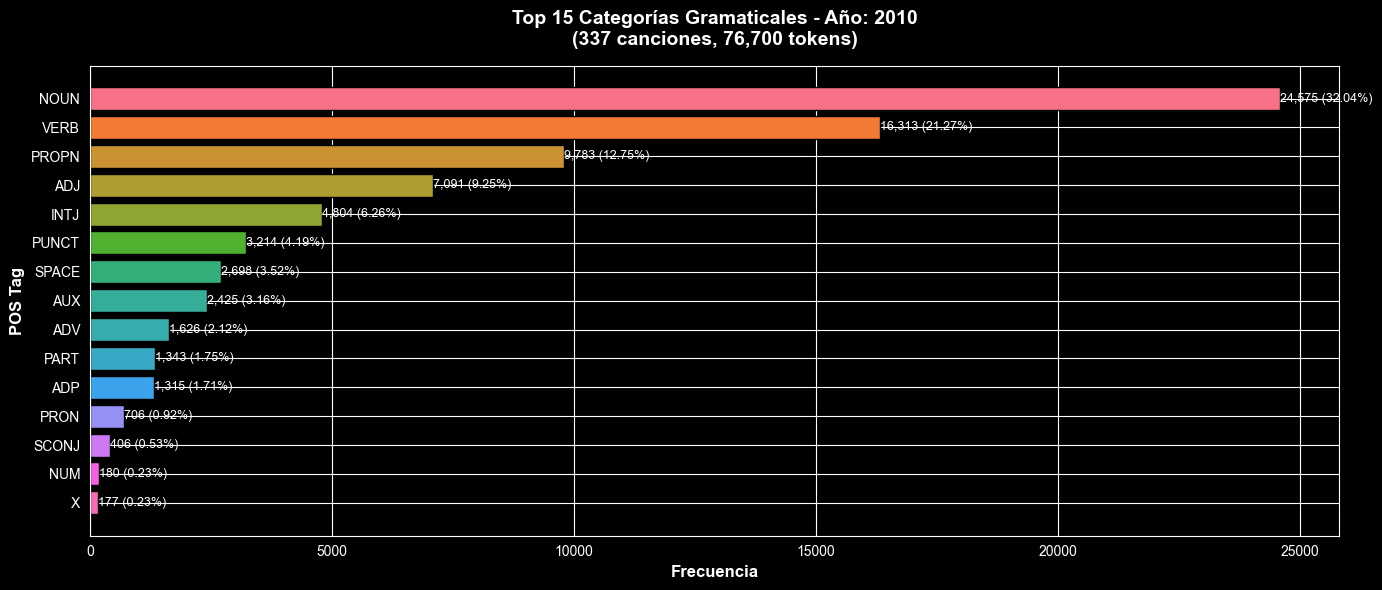

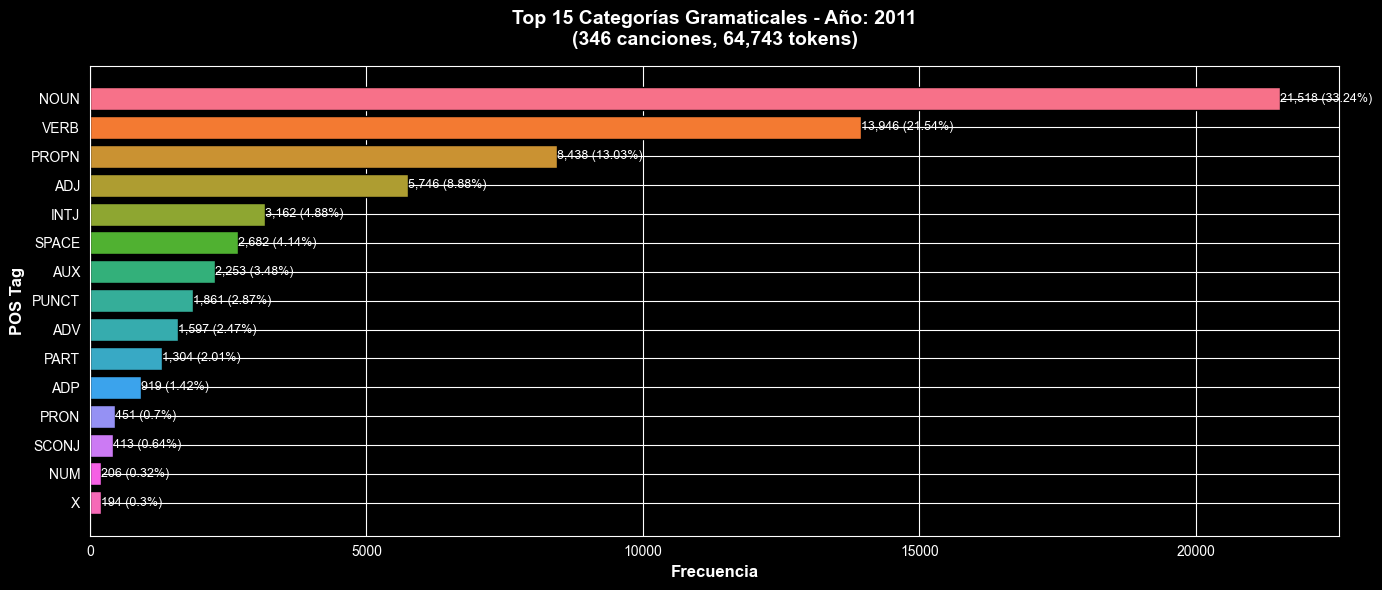

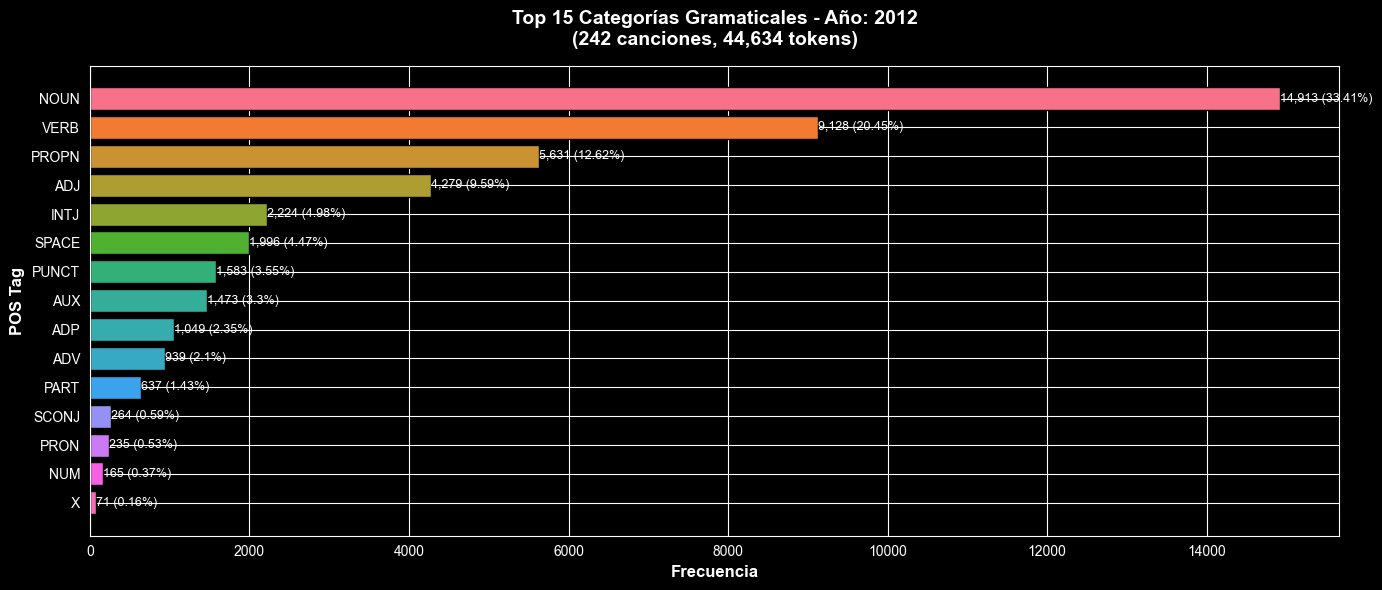

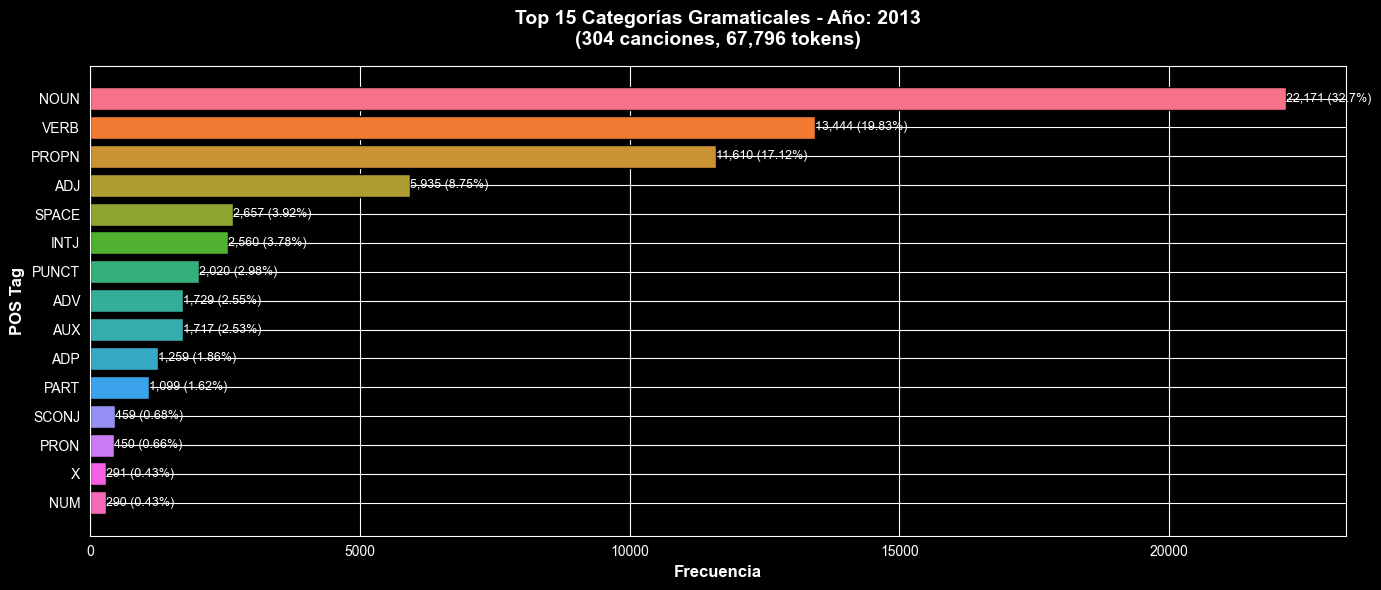

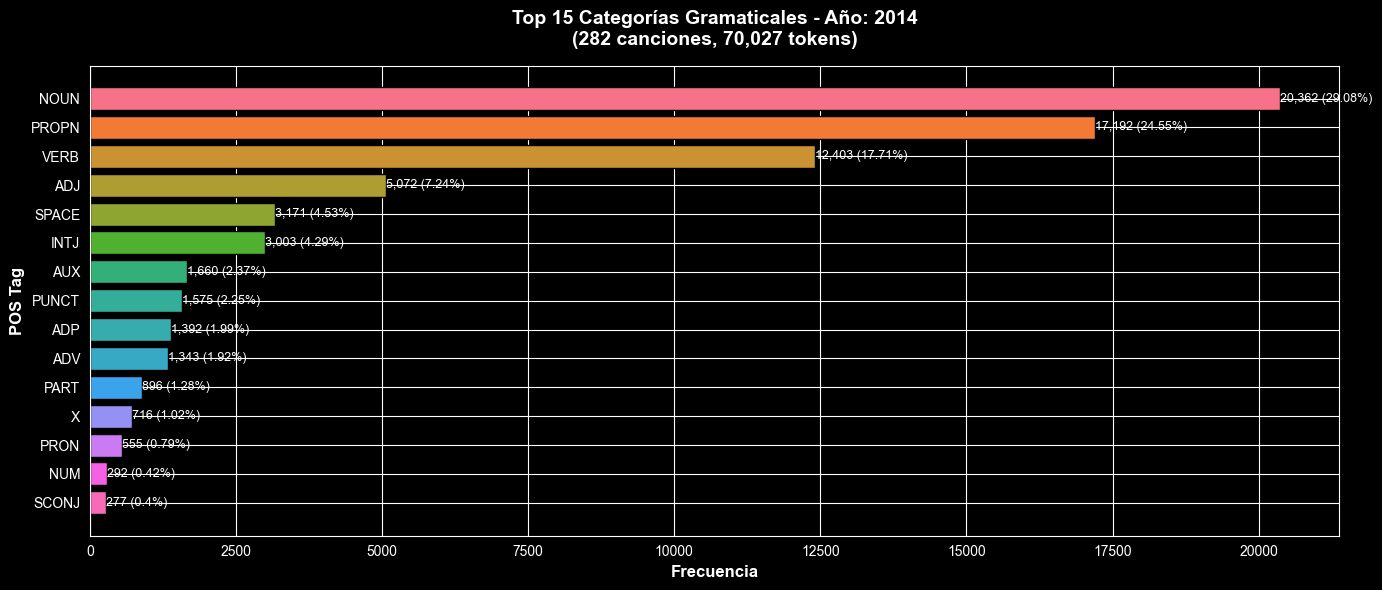

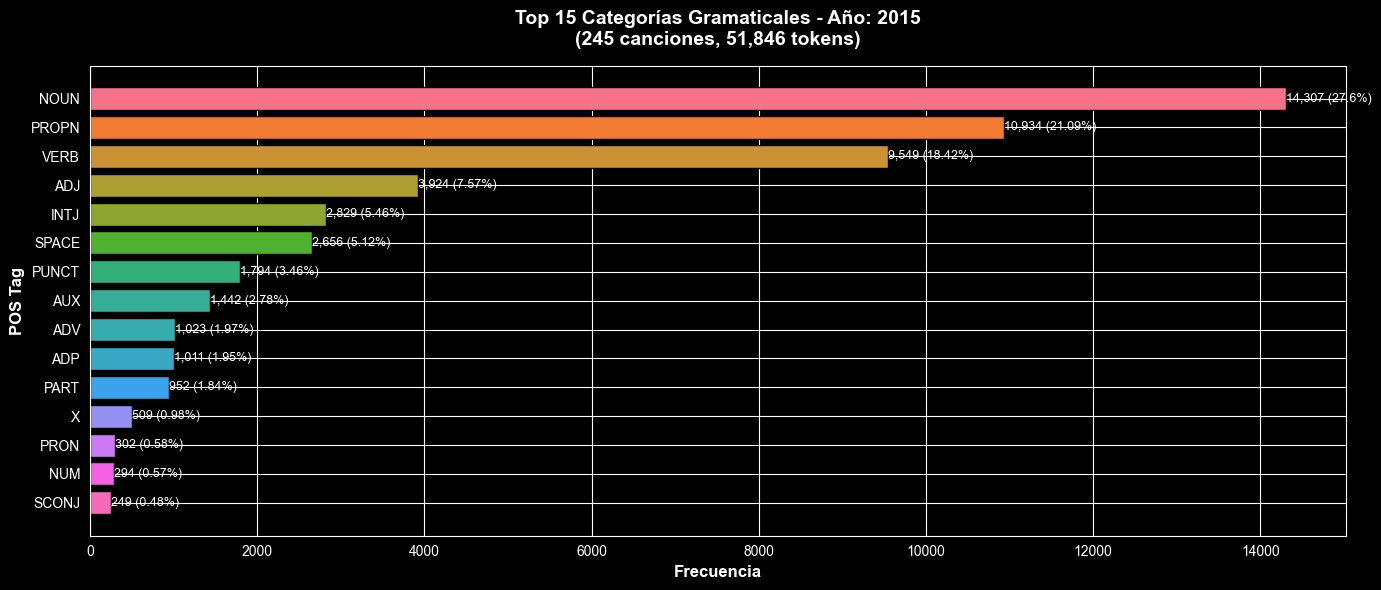

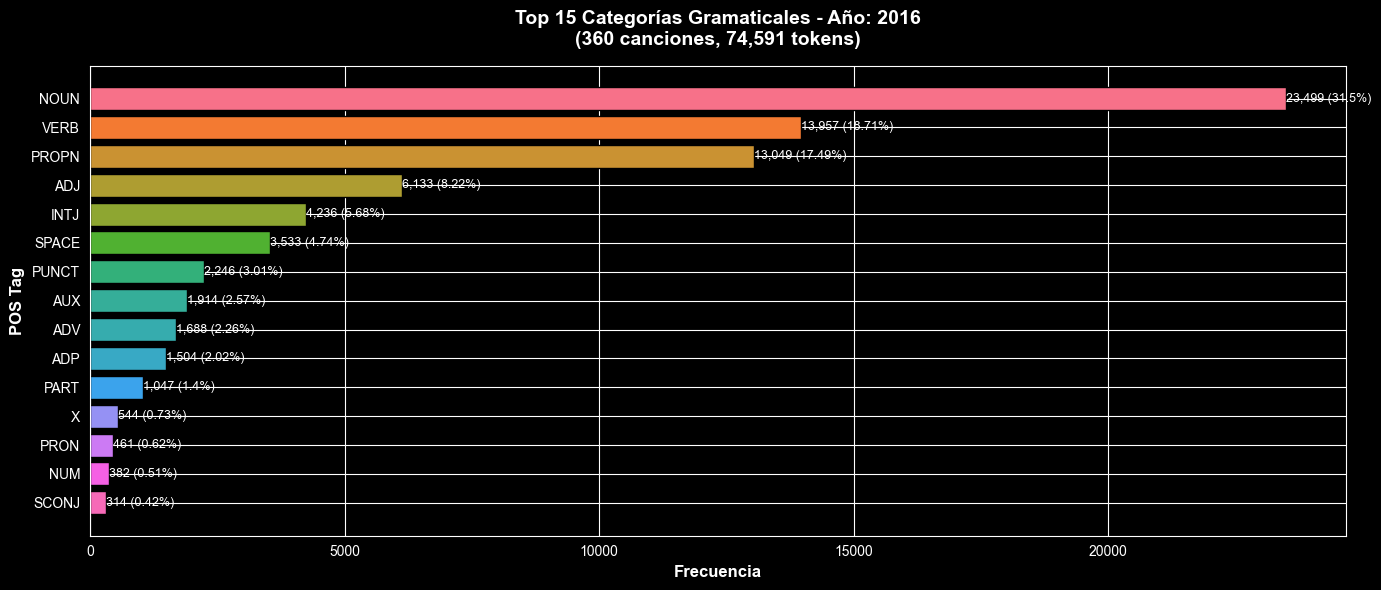

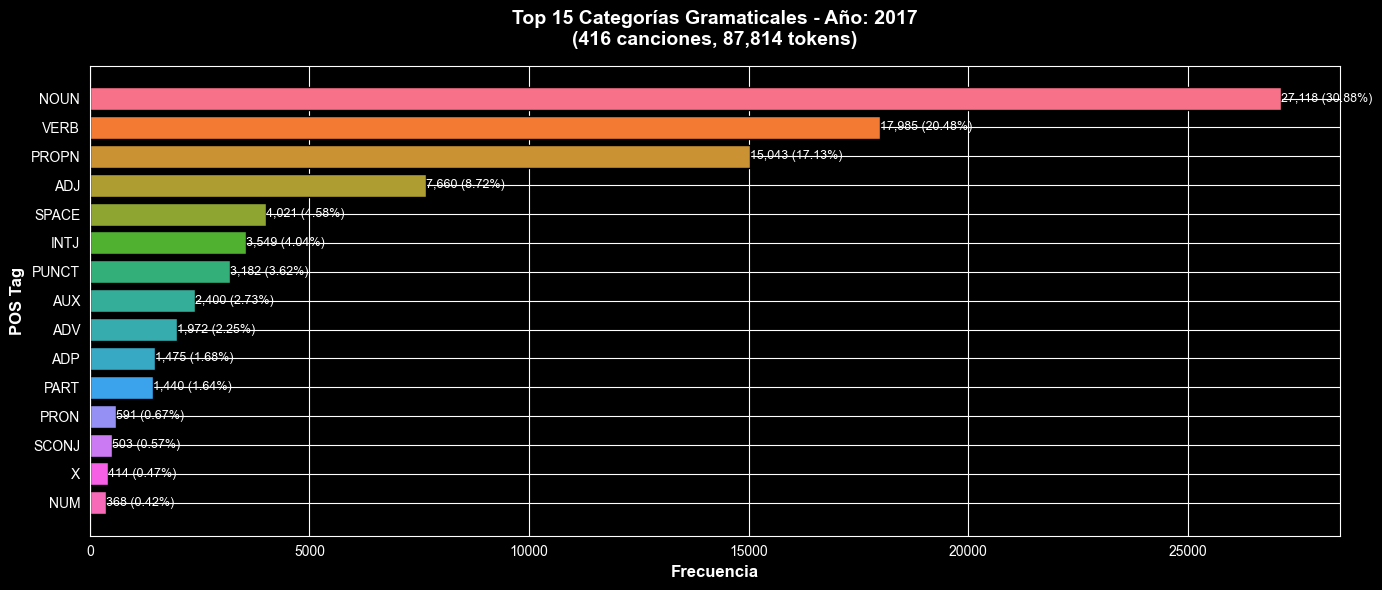

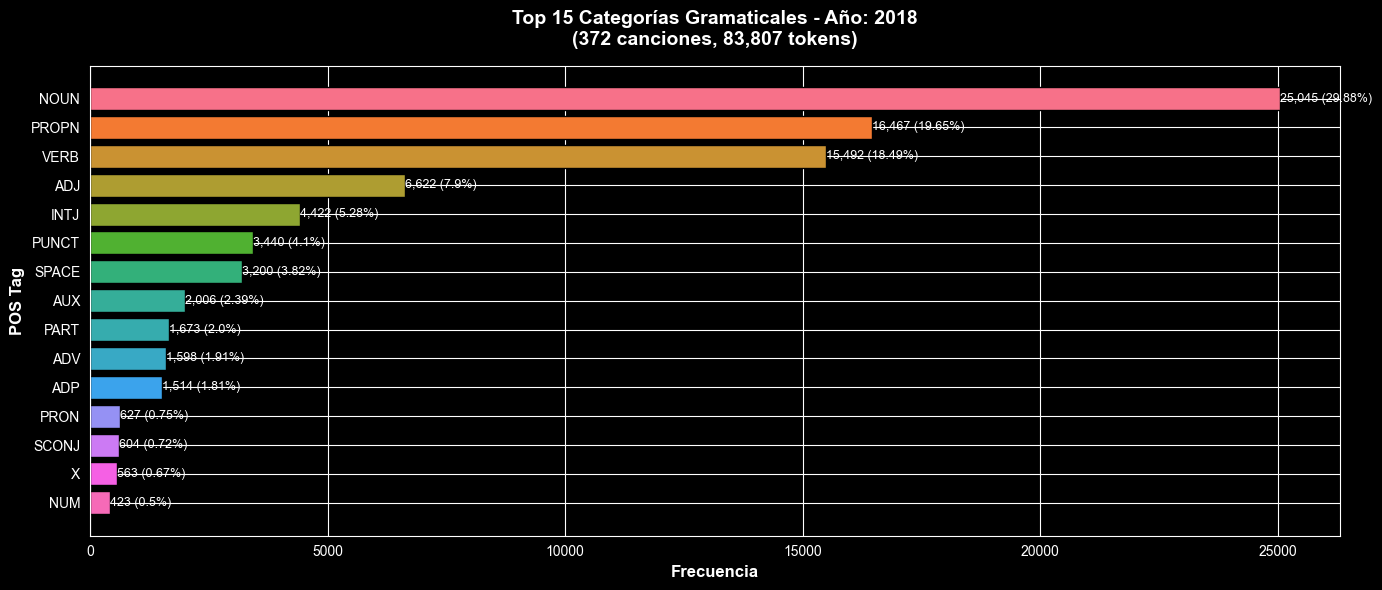

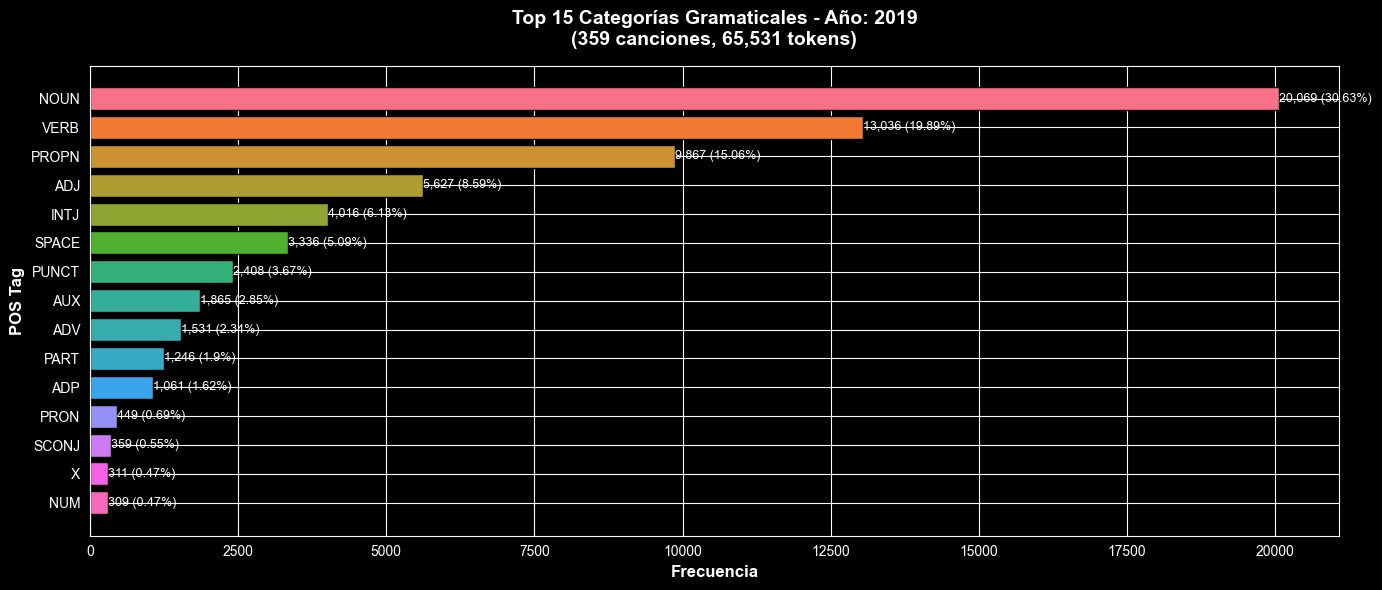

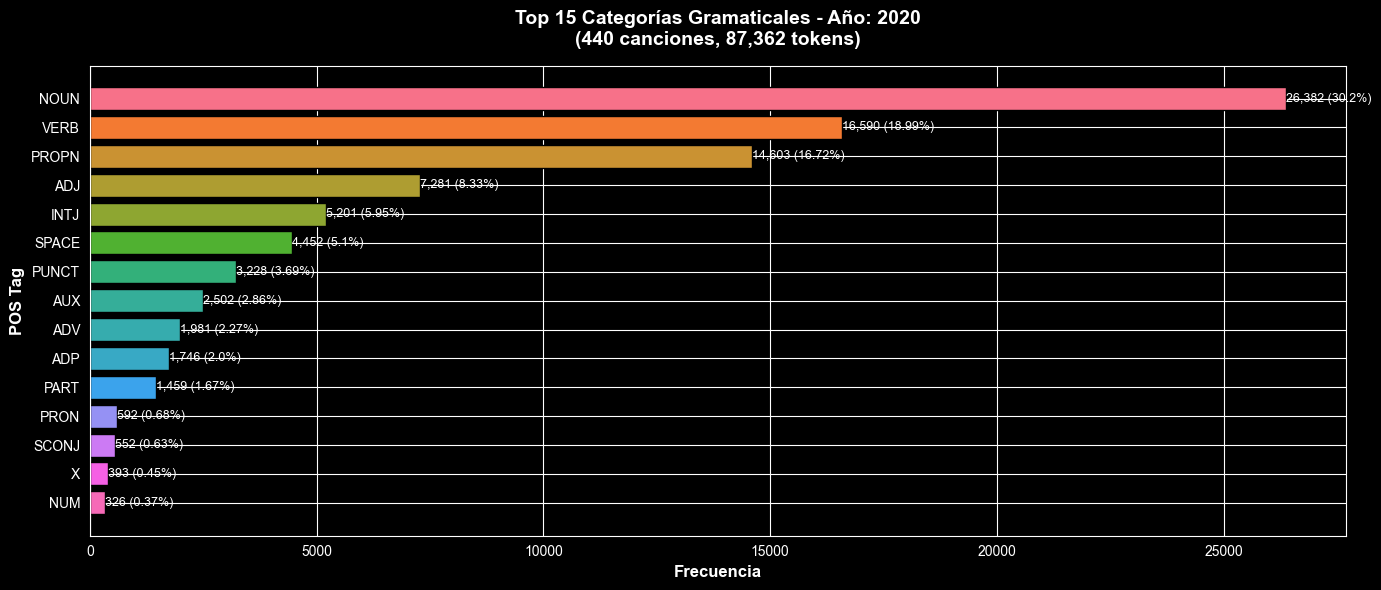

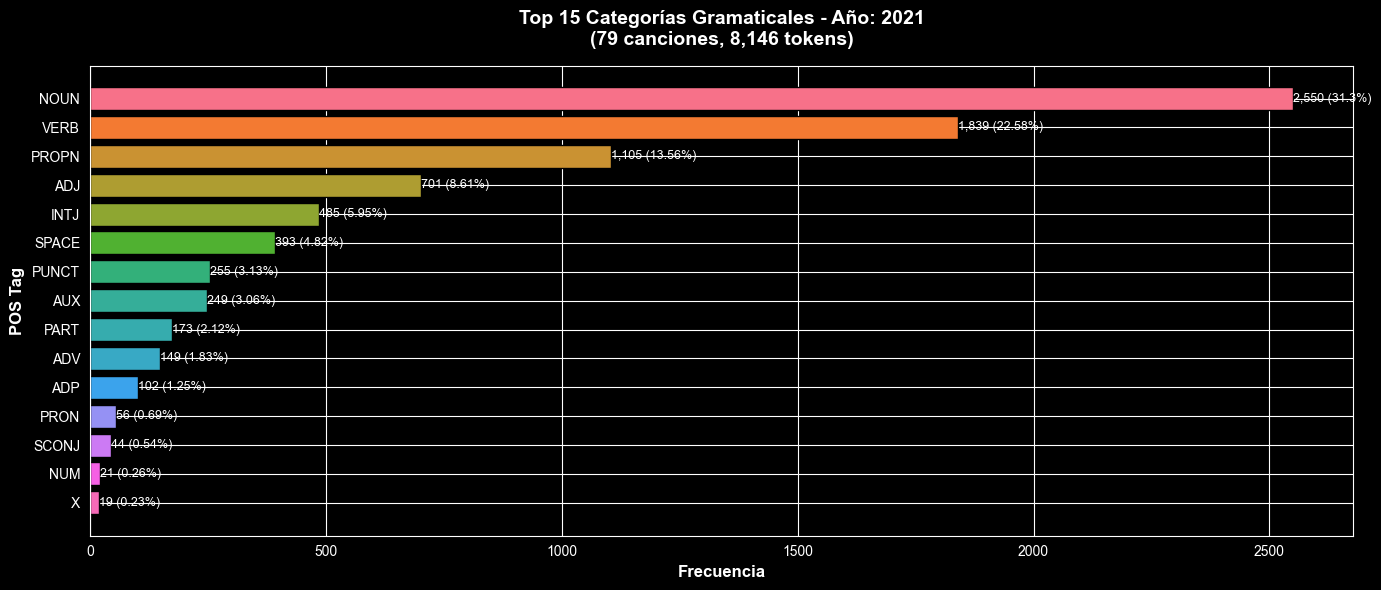

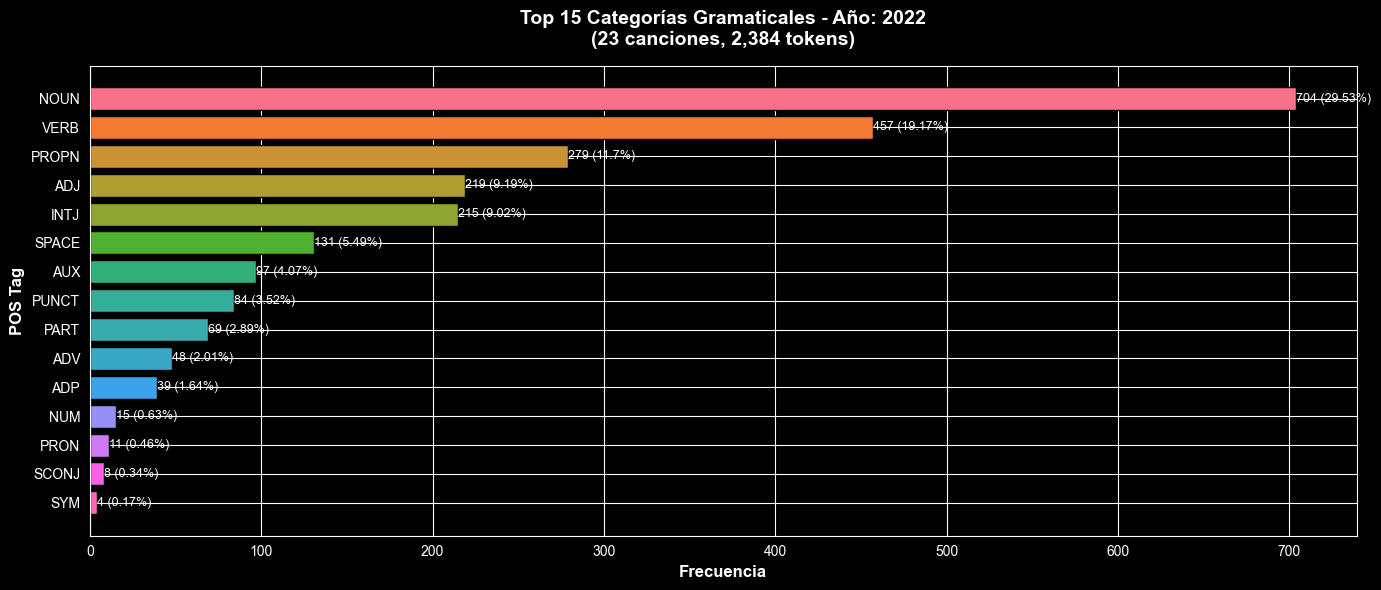

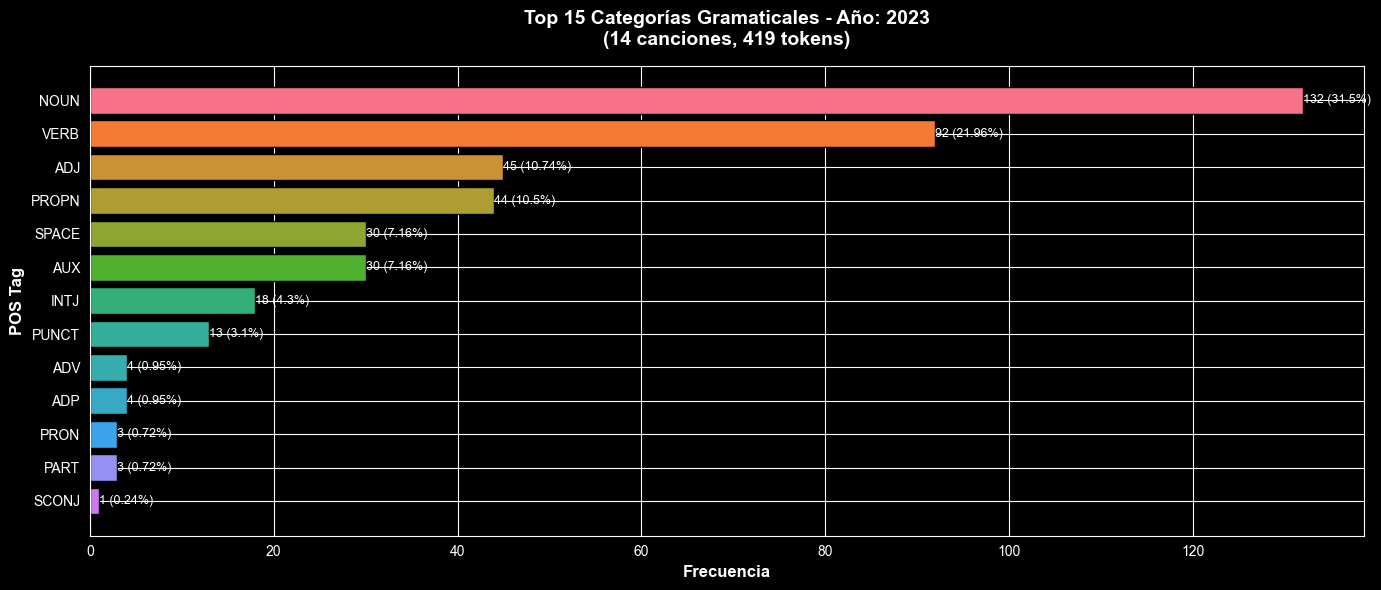

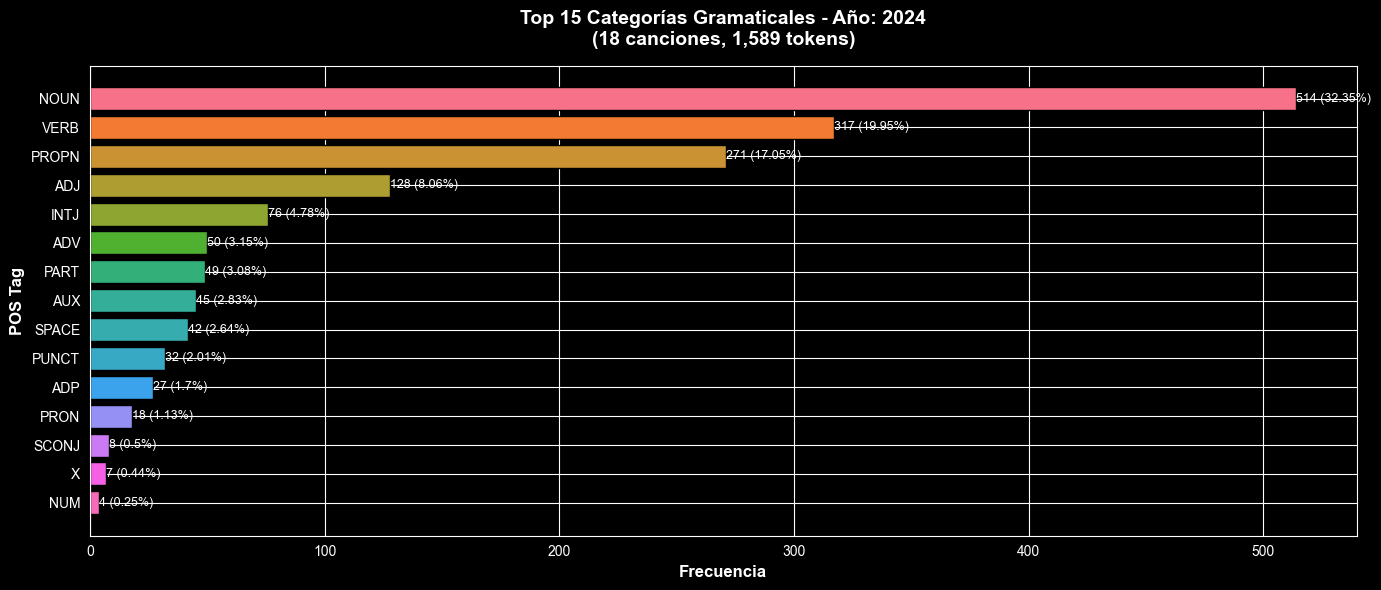

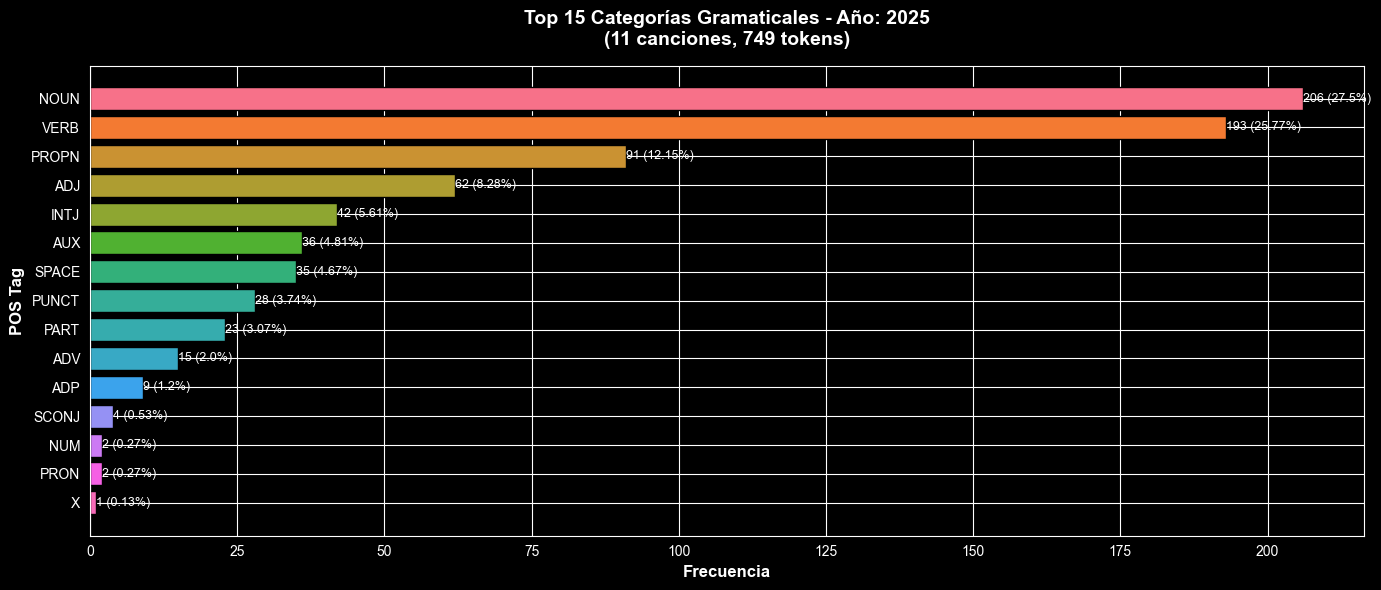

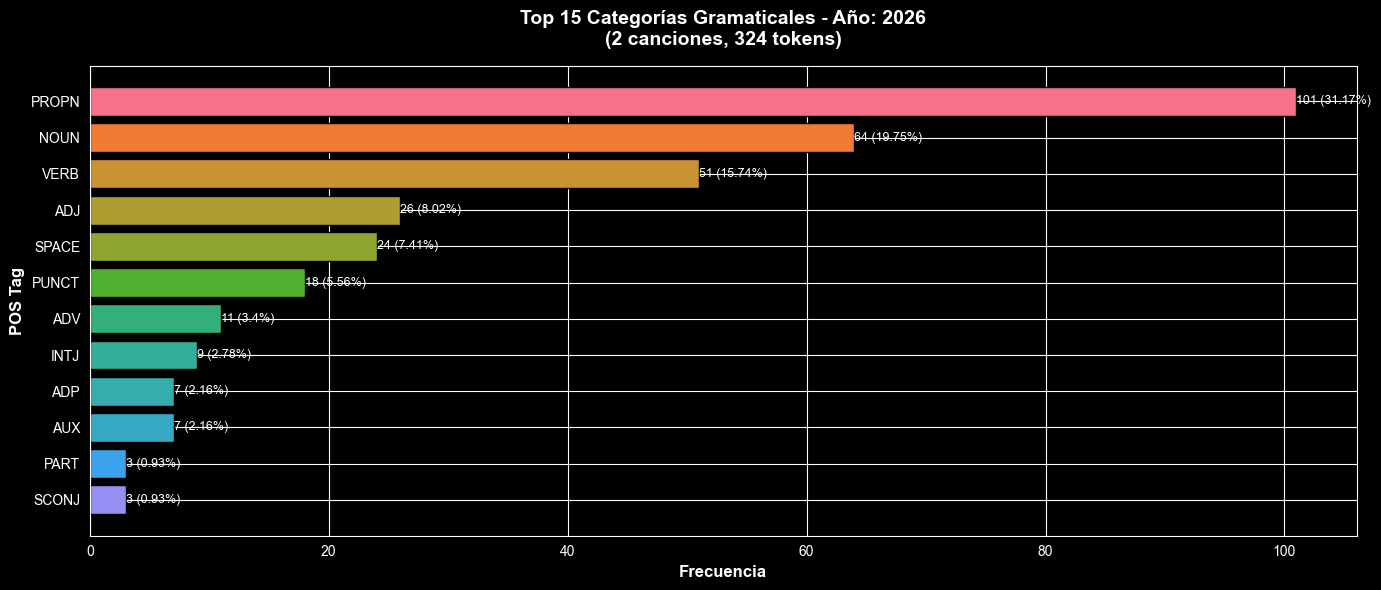

In [18]:
for idx, anio in enumerate(anios):
    fig, ax = plt.subplots(1, 1, figsize=(14, 6))

    pos_df = resultados_por_anio[anio]['pos_df']
    top_15 = pos_df.head(15)

    bars = ax.barh(top_15['POS_Tag'], top_15['Frecuencia'],
                   color=sns.color_palette('husl', 15), edgecolor='black')

    for i, bar in enumerate(bars):
        width = bar.get_width()
        ax.text(width, bar.get_y() + bar.get_height()/2,
                f'{int(width):,} ({top_15.iloc[i]["Porcentaje"]}%)',
                ha='left', va='center', fontsize=9)

    ax.set_xlabel('Frecuencia', fontsize=12, fontweight='bold')
    ax.set_ylabel('POS Tag', fontsize=12, fontweight='bold')
    ax.set_title(f'Top 15 Categorías Gramaticales - Año: {int(anio)}\n'
                 f'({resultados_por_anio[anio]["num_canciones"]} canciones, '
                 f'{resultados_por_anio[anio]["total_tokens"]:,} tokens)',
                 fontsize=14, fontweight='bold', pad=15)
    ax.invert_yaxis()

    plt.tight_layout()
    plt.show()
    plt.close(fig)